<a href="https://colab.research.google.com/github/ashita27/The-Daily-Buzz-Rainfall-Prediction/blob/main/SRainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing importing Libraries

In [ ]:
import pandas as pd
import numpy as nd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import   roc_curve , auc
from sklearn import metrics

In [ ]:
# here we load all the important data using pandas library:
df=pd.read_excel('sydney_rain prediction.xlsx',header=0)

In [ ]:
# Show the first five rows of the datset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


## Data Preprocessing

#### Dummy variable creation

In [ ]:
# getting dummy variable for the data RainToday & RainTomorrow categorical value:

df=pd.get_dummies(df,columns=["RainToday","RainTomorrow"],drop_first=True)

In [ ]:
# Checking for the categorical variable is changed into integer trype or not
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True


## Converting Dummy variables into integer type

In [ ]:
# Converting dummy variables ,strin g value to int values:
df=df.astype({"RainToday_Yes":"int","RainTomorrow_Yes":"int"})

In [ ]:
# Checking the values that the values are converted in int or no
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


## Correleation Matrix

In [ ]:
# To analyze the correleation  with dependent variable and "Multi collinearity" between two independent variable
df.corr(numeric_only=True)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.770893,0.012883,0.571257,-0.063154,0.052490,0.271686,-0.393827,-0.356406,0.260508,0.180094,0.939116,0.752922,0.018700,0.079975
MaxTemp,0.770893,1.000000,-0.140107,0.513138,0.326683,-0.187437,-0.152615,-0.389088,-0.425169,-0.095859,-0.108426,0.859346,0.960457,-0.188354,-0.149285
Rainfall,0.012883,-0.140107,1.000000,-0.126143,-0.308044,0.331045,0.301681,-0.037051,0.003216,0.277427,0.229576,-0.056061,-0.143698,0.555191,0.294121
Evaporation,0.571257,0.513138,-0.126143,1.000000,0.177628,-0.399019,-0.103246,-0.349421,-0.303330,-0.041160,-0.041205,0.608872,0.477629,-0.232707,-0.065221
Sunshine,-0.063154,0.326683,-0.308044,0.177628,1.000000,-0.490967,-0.585736,-0.046654,-0.094841,-0.734302,-0.751838,0.115135,0.345139,-0.368081,-0.523060
Humidity9am,0.052490,-0.187437,0.331045,-0.399019,-0.490967,1.000000,0.659194,0.263977,0.252360,0.459455,0.359910,-0.148239,-0.157598,0.401350,0.329501
Humidity3pm,0.271686,-0.152615,0.301681,-0.103246,-0.585736,0.659194,1.000000,0.154908,0.183647,0.498119,0.517755,0.128818,-0.214047,0.343558,0.472105
Pressure9am,-0.393827,-0.389088,-0.037051,-0.349421,-0.046654,0.263977,0.154908,1.000000,0.963173,-0.012196,-0.044233,-0.419440,-0.346731,-0.000113,-0.032536
Pressure3pm,-0.356406,-0.425169,0.003216,-0.303330,-0.094841,0.252360,0.183647,0.963173,1.000000,0.020884,-0.003187,-0.405047,-0.392653,0.057121,0.011004
Cloud9am,0.260508,-0.095859,0.277427,-0.041160,-0.734302,0.459455,0.498119,-0.012196,0.020884,1.000000,0.609556,0.097135,-0.098202,0.349422,0.364861


#### Observations:

MinTemp, Temp9am: Both features are independent variables and have a strong correlation (> 0.8) between them. Dropped Temp9am — The correlation between MinTemp and Rainfall is higher as well, to avoid multicollinearity.

MaxTemp, Temp9am — slight problem with high correlation (> 0.8) Discarded Temp9am since it was less correlated with dependent as compared to MaxTemp.

MaxTemp and Temp3pm: Yet another glaring positive high correlation (> 0.8) between maximum temperature of the day and Temperature at 3 pm [More than likeLY] Dropped MaxTemp because its correlation with the dependent variable is less than MinTemp.

Pressure9am and Pressure3pm:Very high correlation (> 0.8). Opted for dropping Pressure3pm as it has poorer correlation with the dependent variable in comparison to Pressure9am.
Temp3pm and Temp9am: Again, high correlation (> 0.8).Chose to drop Temp9am due to its lower correlation with the dependent variable compared to MinTemp.
Pressure9am, Pressure3pm, and Temp9am:

Analyzed the correlation matrix and found that these variables are not significantly correlated.
Chose to drop Pressure9am.


In [ ]:
# Deleting variables that are not Significantly correlated with Dependent variable and creating "Multi-collinearity".
# Deleting unneccsary and unusefull columns

del df['Temp9am']
del df['MaxTemp']
del df['Pressure3pm']
del df['Pressure9am']
del df['Location']

In [ ]:
df.corr(numeric_only=True)

,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.012883,0.571257,-0.063154,0.052490,0.271686,0.260508,0.180094,0.752922,0.018700,0.079975
Rainfall,0.012883,1.000000,-0.126143,-0.308044,0.331045,0.301681,0.277427,0.229576,-0.143698,0.555191,0.294121
Evaporation,0.571257,-0.126143,1.000000,0.177628,-0.399019,-0.103246,-0.041160,-0.041205,0.477629,-0.232707,-0.065221
Sunshine,-0.063154,-0.308044,0.177628,1.000000,-0.490967,-0.585736,-0.734302,-0.751838,0.345139,-0.368081,-0.523060
Humidity9am,0.052490,0.331045,-0.399019,-0.490967,1.000000,0.659194,0.459455,0.359910,-0.157598,0.401350,0.329501
Humidity3pm,0.271686,0.301681,-0.103246,-0.585736,0.659194,1.000000,0.498119,0.517755,-0.214047,0.343558,0.472105
Cloud9am,0.260508,0.277427,-0.041160,-0.734302,0.459455,0.498119,1.000000,0.609556,-0.098202,0.349422,0.364861
Cloud3pm,0.180094,0.229576,-0.041205,-0.751838,0.359910,0.517755,0.609556,1.000000,-0.159852,0.287481,0.456955
Temp3pm,0.752922,-0.143698,0.477629,0.345139,-0.157598,-0.214047,-0.098202,-0.159852,1.000000,-0.189245,-0.188991
RainToday_Yes,0.018700,0.555191,-0.232707,-0.368081,0.401350,0.343558,0.349422,0.287481,-0.189245,1.000000,0.340894


In [ ]:
# Storing the correleation matrix data into new variable
df_corr_data=df.corr(numeric_only=True)

<Axes: >

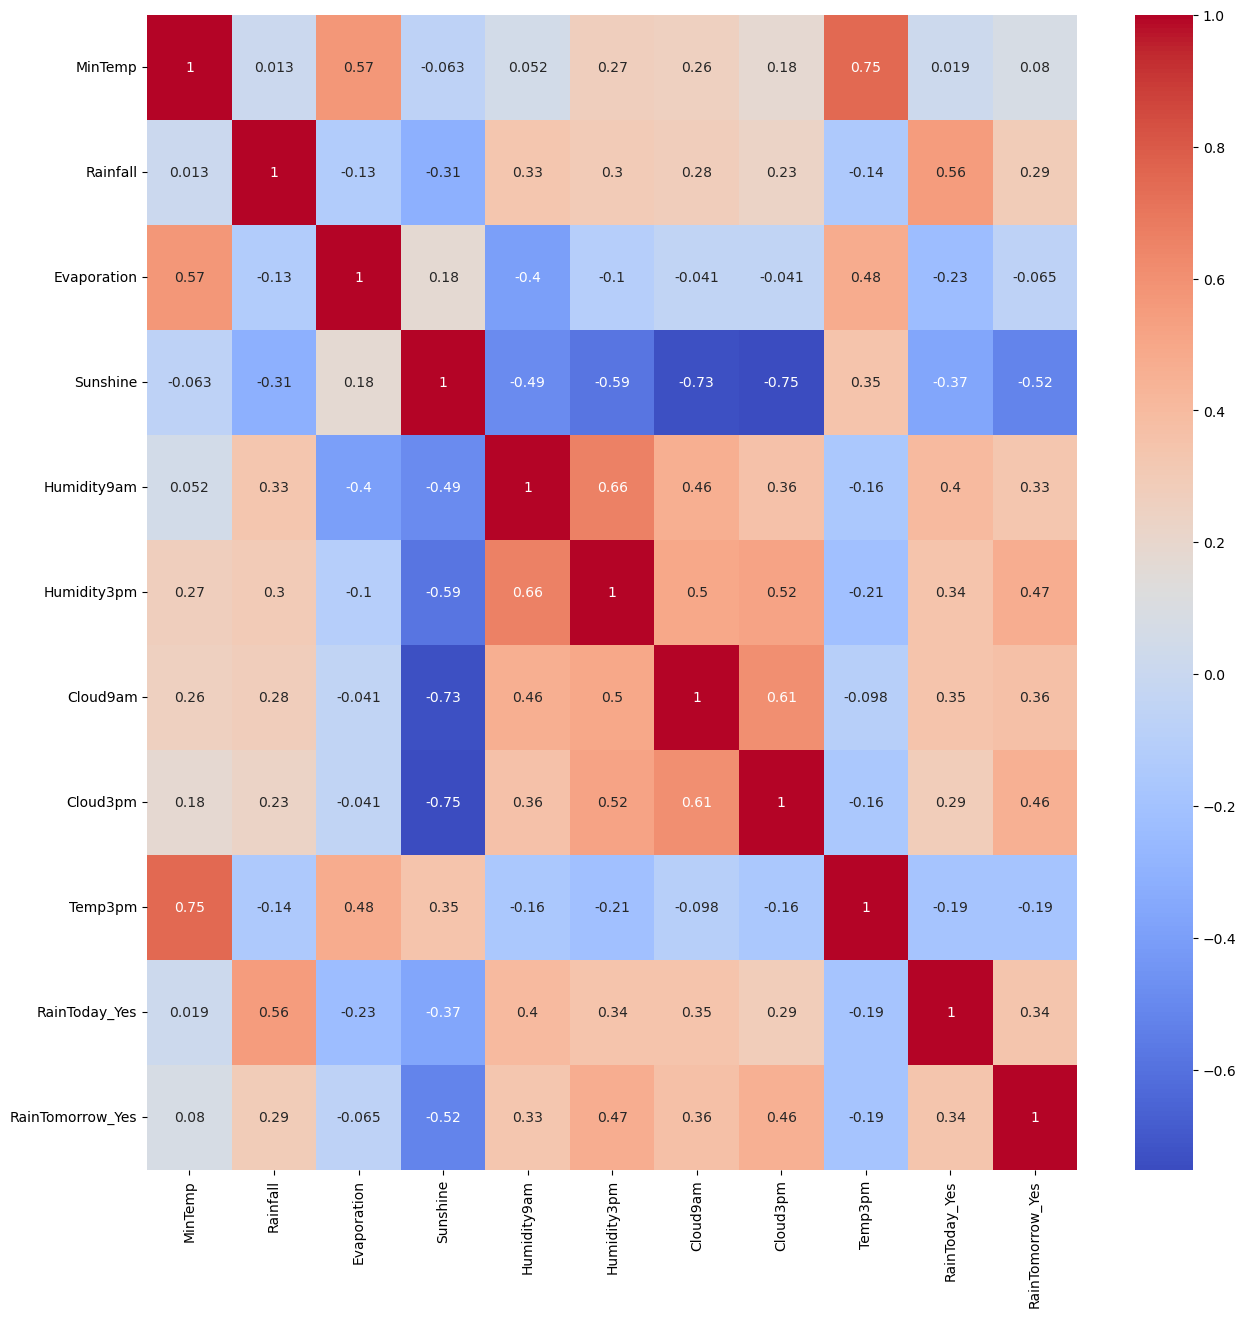

In [ ]:
# Plotting the Heatmap of correleation matrix:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr_data,cmap='coolwarm',annot=True)

### Missing value Imputation

In [ ]:
# Checking summaryof the dataframe in order to find any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   MinTemp           3334 non-null   float64       
 2   Rainfall          3331 non-null   float64       
 3   Evaporation       3286 non-null   float64       
 4   Sunshine          3321 non-null   float64       
 5   Humidity9am       3323 non-null   float64       
 6   Humidity3pm       3324 non-null   float64       
 7   Cloud9am          2771 non-null   float64       
 8   Cloud3pm          2776 non-null   float64       
 9   Temp3pm           3333 non-null   float64       
 10  RainToday_Yes     3337 non-null   int32         
 11  RainTomorrow_Yes  3337 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int32(2)
memory usage: 286.9 KB


In [ ]:
# Missing value Imputation

df['MinTemp'].fillna(value = df['MinTemp'].mean(), inplace = True)
df['Rainfall'].fillna(value = df['Rainfall'].mean(), inplace = True)
df['Evaporation'].fillna(value = df['Evaporation'].mean(), inplace = True)
df['Sunshine'].fillna(value = df['Sunshine'].mean(), inplace = True)
df['Humidity9am'].fillna(value = df['Humidity9am'].mean(), inplace = True)
df['Humidity3pm'].fillna(value = df['Humidity3pm'].mean(), inplace = True)
df['Cloud9am'].fillna(value = df['Cloud9am'].mean(), inplace = True)
df['Cloud3pm'].fillna(value = df['Cloud3pm'].mean(), inplace = True)
df['Temp3pm'].fillna(value = df['Temp3pm'].mean(), inplace = True)

C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\42761721.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MinTemp'].fillna(value = df['MinTemp'].mean(), inplace = True)
C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\42761721.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [ ]:
# Checking summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   MinTemp           3337 non-null   float64       
 2   Rainfall          3337 non-null   float64       
 3   Evaporation       3337 non-null   float64       
 4   Sunshine          3337 non-null   float64       
 5   Humidity9am       3337 non-null   float64       
 6   Humidity3pm       3337 non-null   float64       
 7   Cloud9am          3337 non-null   float64       
 8   Cloud3pm          3337 non-null   float64       
 9   Temp3pm           3337 non-null   float64       
 10  RainToday_Yes     3337 non-null   int32         
 11  RainTomorrow_Yes  3337 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int32(2)
memory usage: 286.9 KB


## Outlier Treatment

In [ ]:
# Getting EDD OF DATA TO FIND ANY Outlier in the data
df.describe()

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865057,3.330231,5.187432,7.179374,68.229010,54.699158,4.181523,4.218660,21.533333,0.259515,0.259215
min,2008-02-01 00:00:00,4.300000,0.000000,0.000000,0.000000,19.000000,10.000000,0.000000,0.000000,10.200000,0.000000,0.000000
25%,2010-05-15 00:00:00,11.000000,0.000000,3.200000,4.300000,58.000000,44.000000,2.000000,2.000000,18.400000,0.000000,0.000000
50%,2012-09-28 00:00:00,14.900000,0.000000,4.800000,8.200000,69.000000,56.000000,4.181523,4.218660,21.300000,0.000000,0.000000
75%,2015-03-14 00:00:00,18.700000,1.400000,7.000000,10.200000,80.000000,64.000000,7.000000,7.000000,24.500000,1.000000,1.000000
max,2017-06-25 00:00:00,27.600000,119.400000,18.400000,13.600000,100.000000,99.000000,9.000000,8.000000,44.700000,1.000000,1.000000
std,NaN,4.551593,9.886270,2.756095,3.801737,15.053668,16.261752,2.505491,2.409531,4.301156,0.438434,0.438269


In [ ]:
# Distributing all features according to their types and storing them in new variables & variable name describing thier types.

numerical_feature = [feature for feature in df.columns if df[feature].dtypes != df['Date']]
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 11
Discrete feature Count 4
Continuous feature Count 7
Categorical feature Count 1


C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\2301530714.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


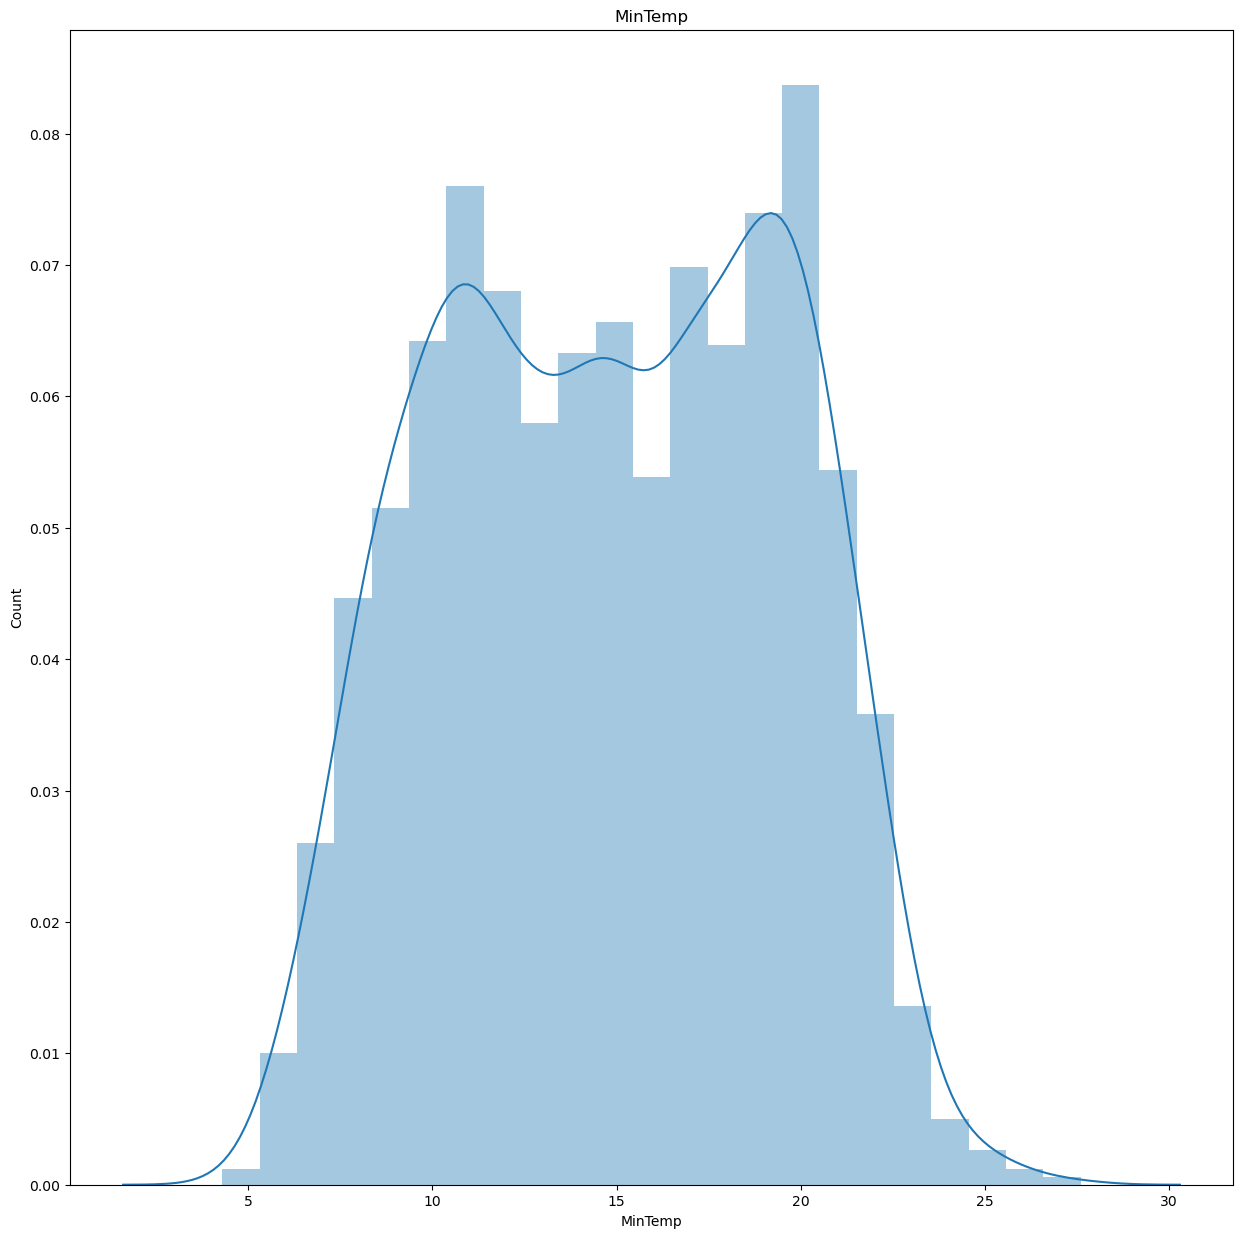

C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\2301530714.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


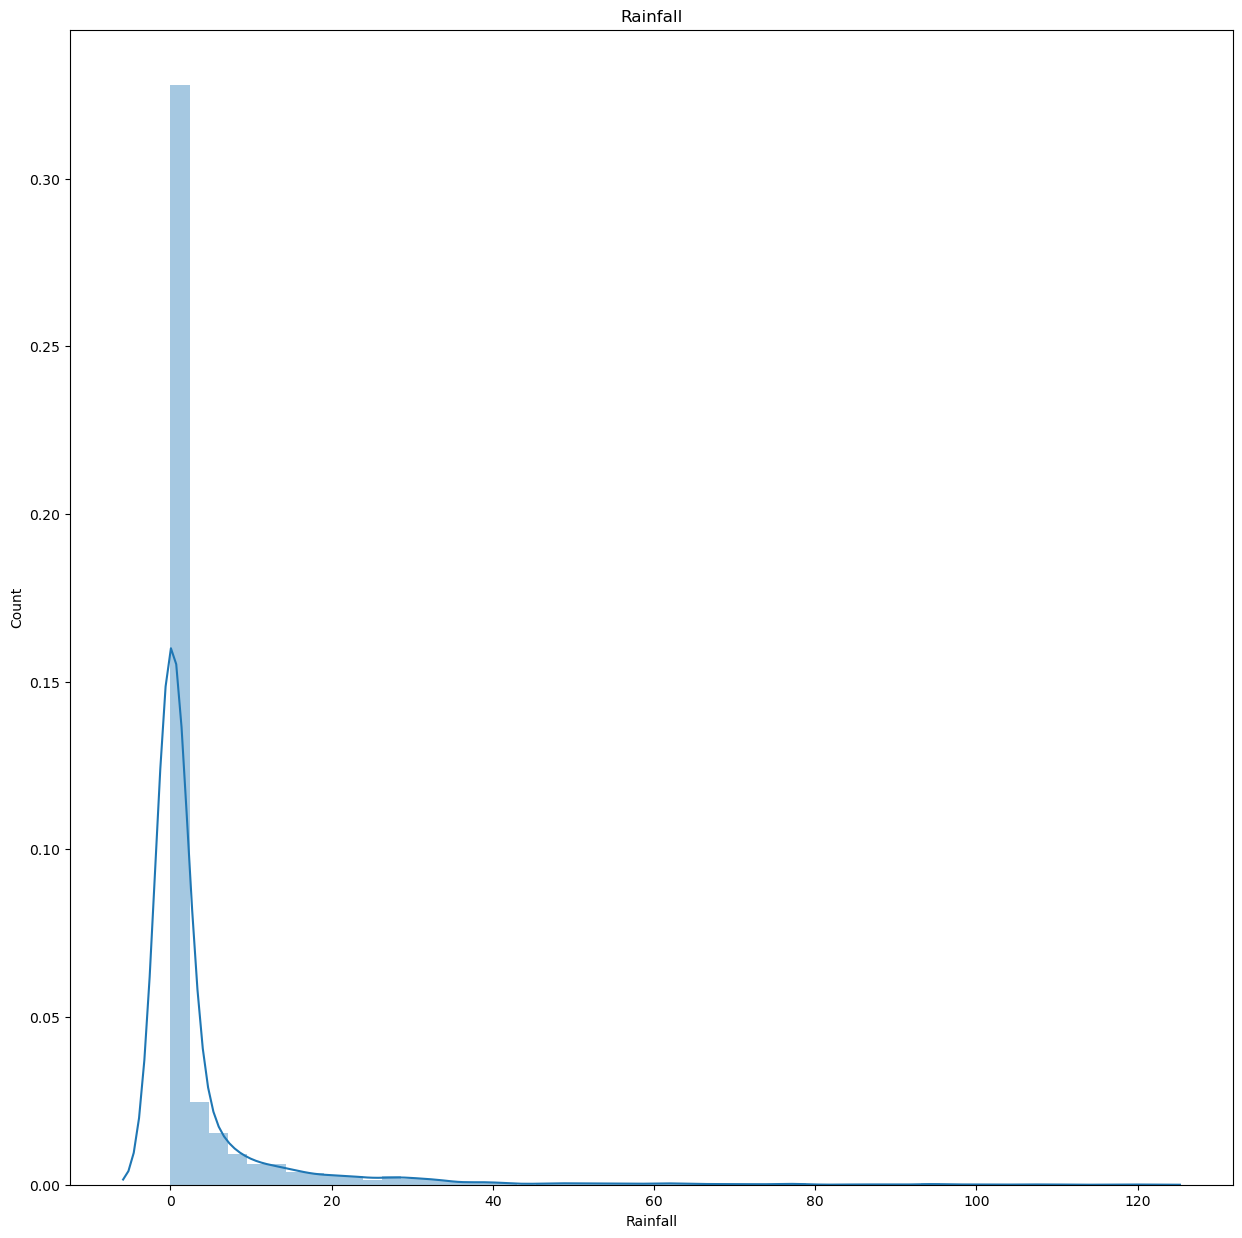

C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\2301530714.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


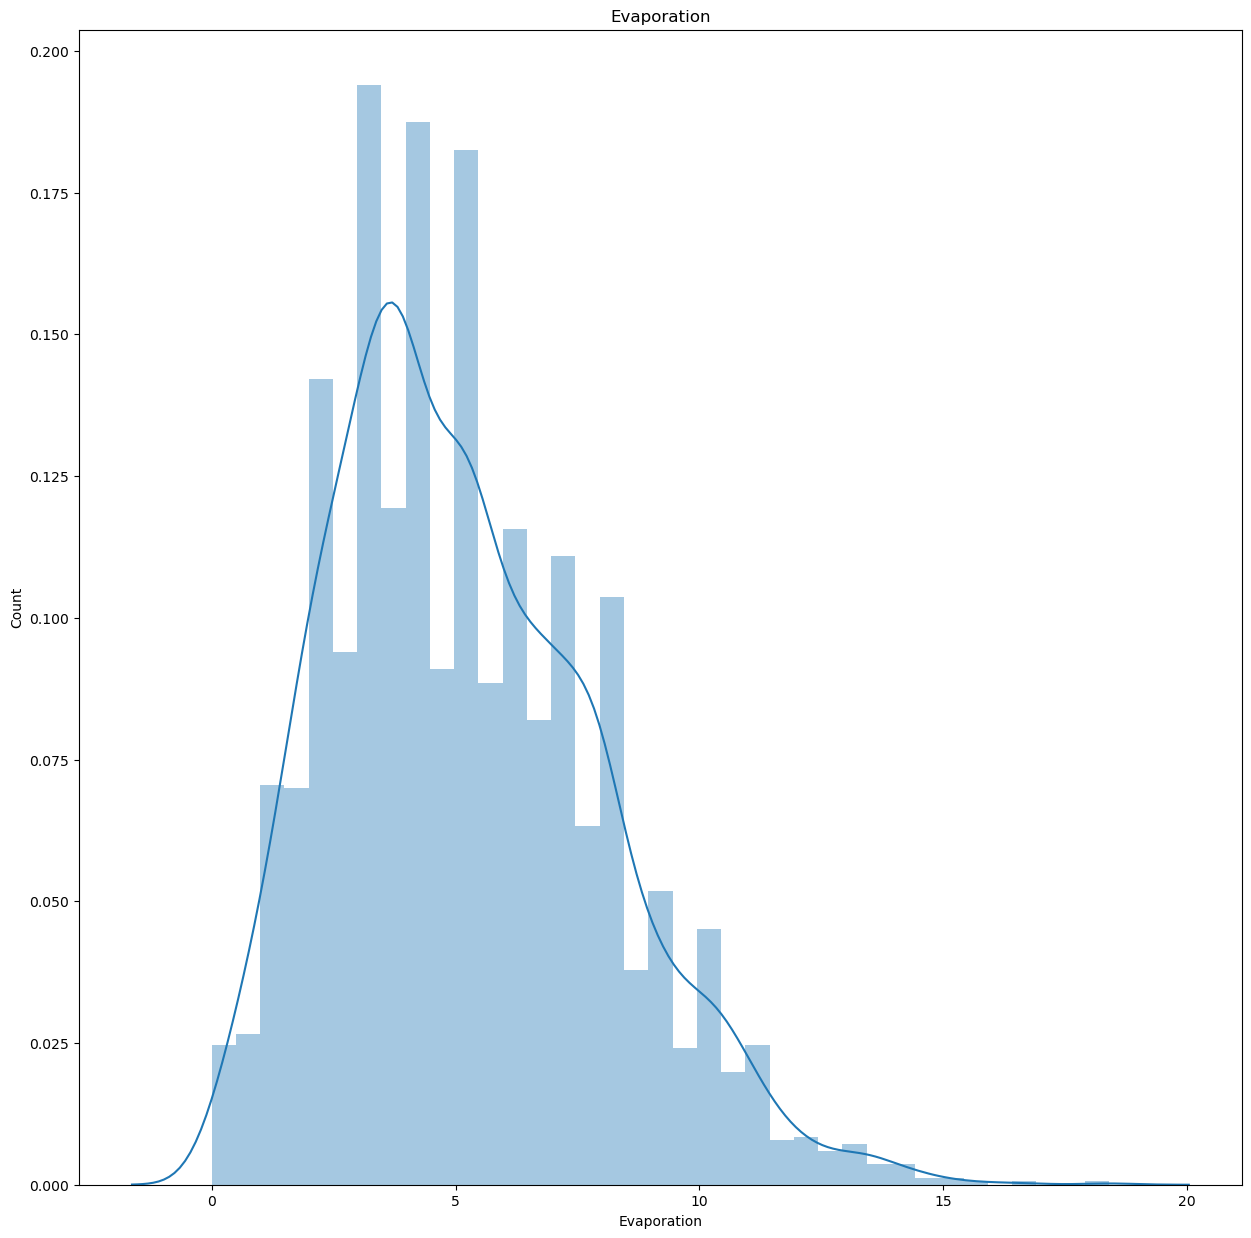

C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\2301530714.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


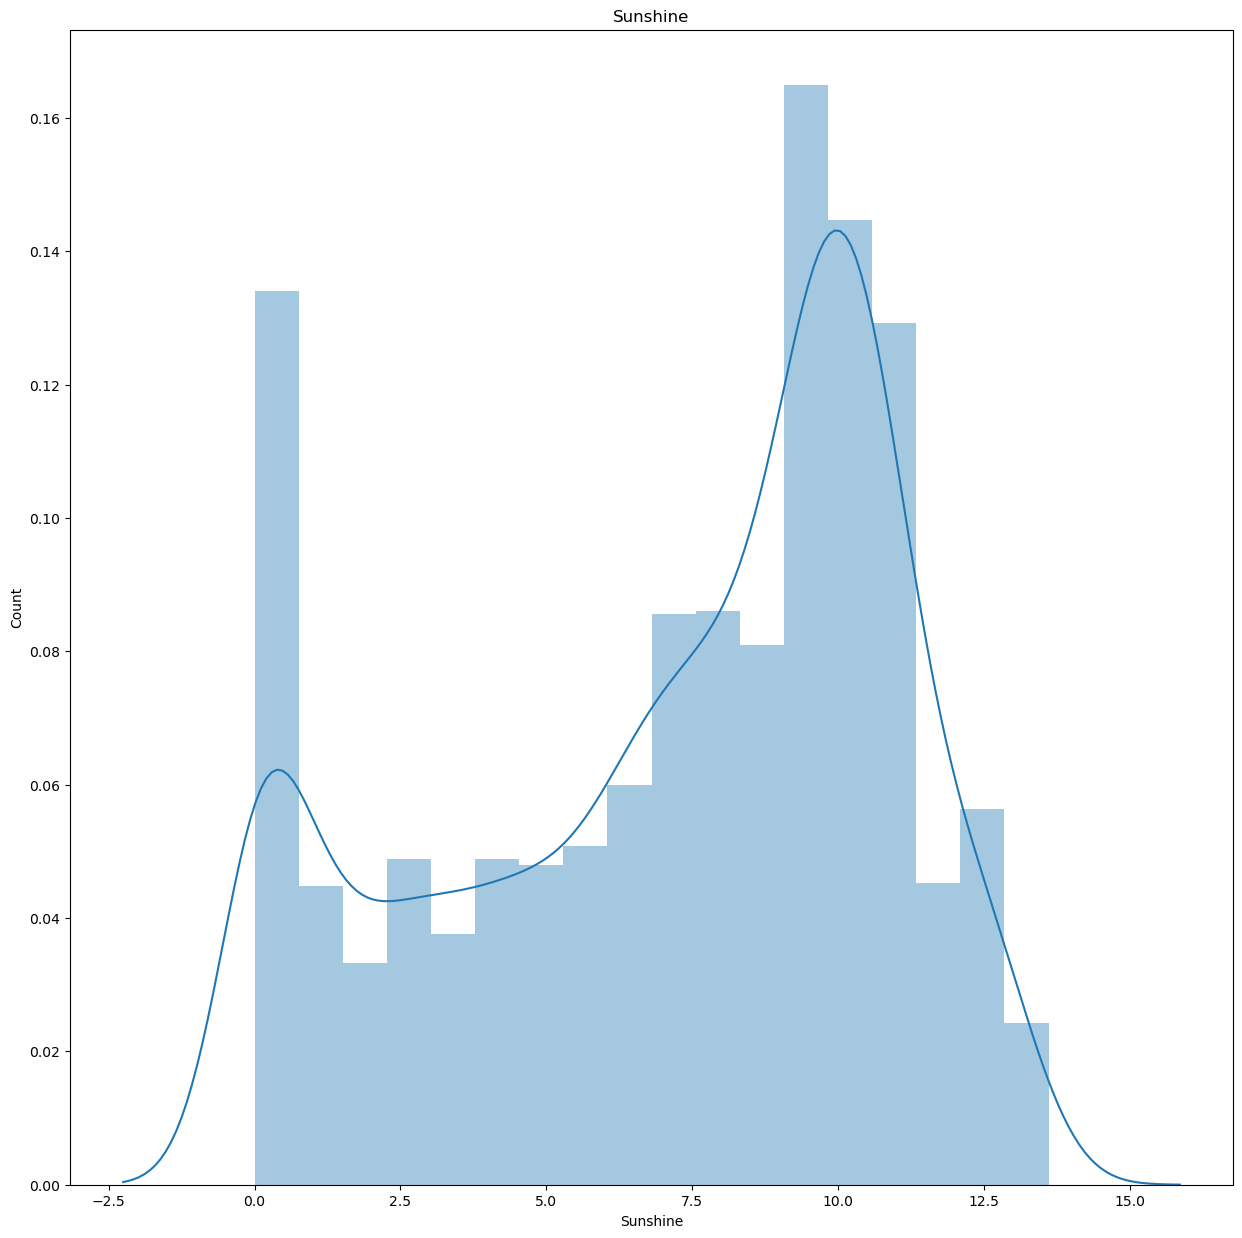

C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\2301530714.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


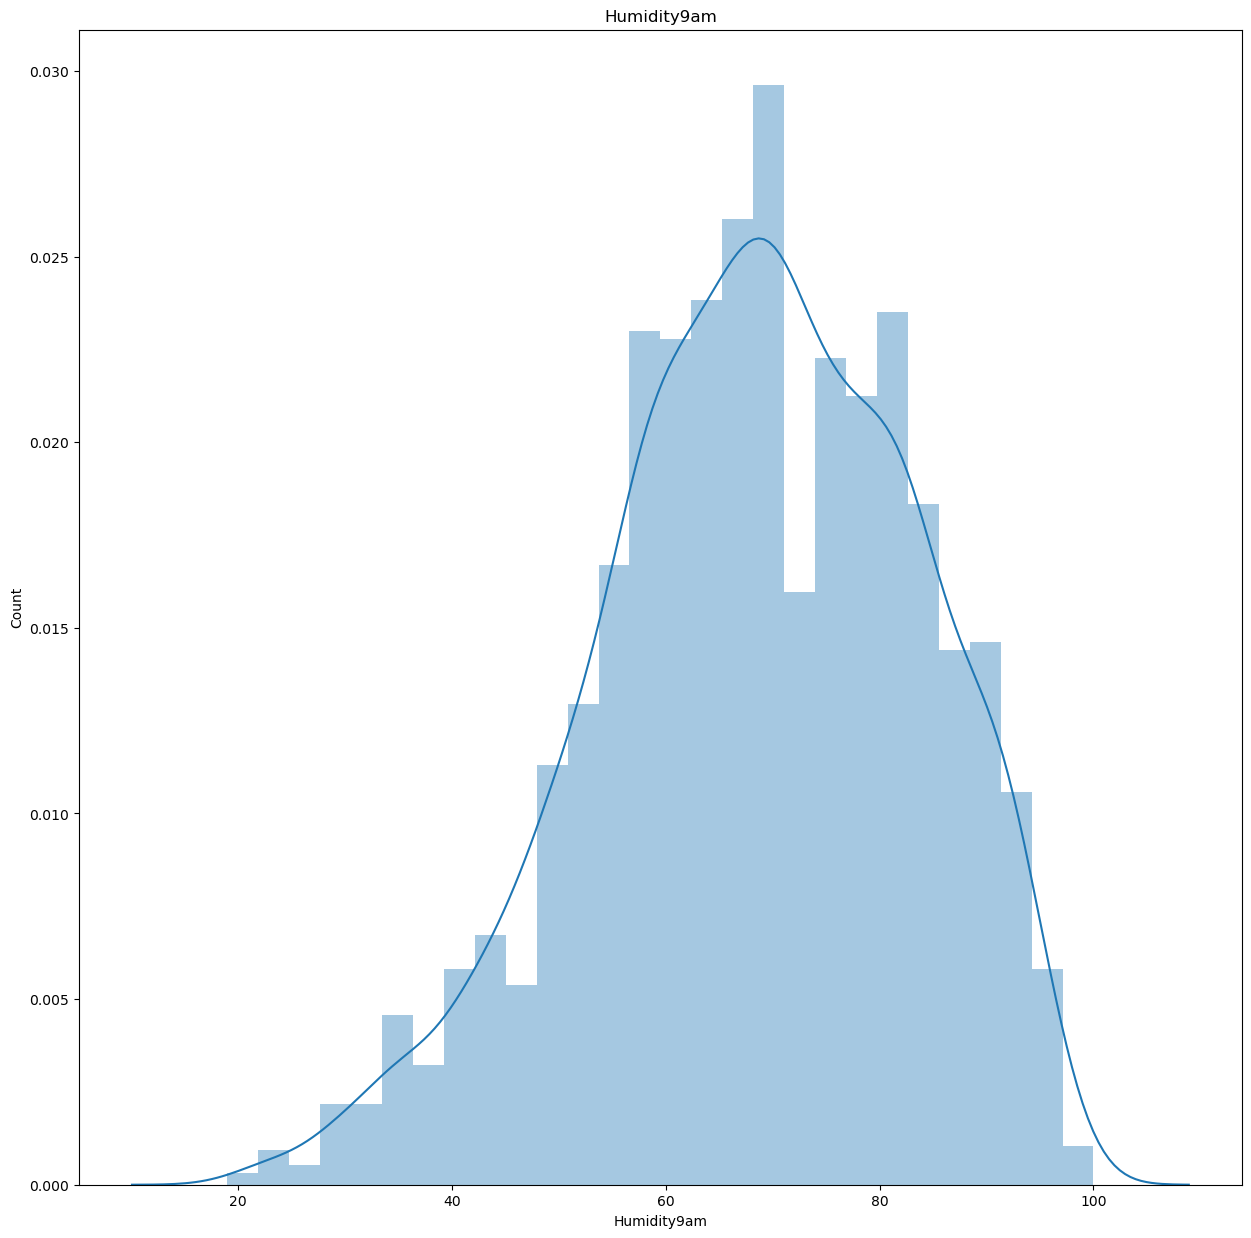

C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\2301530714.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


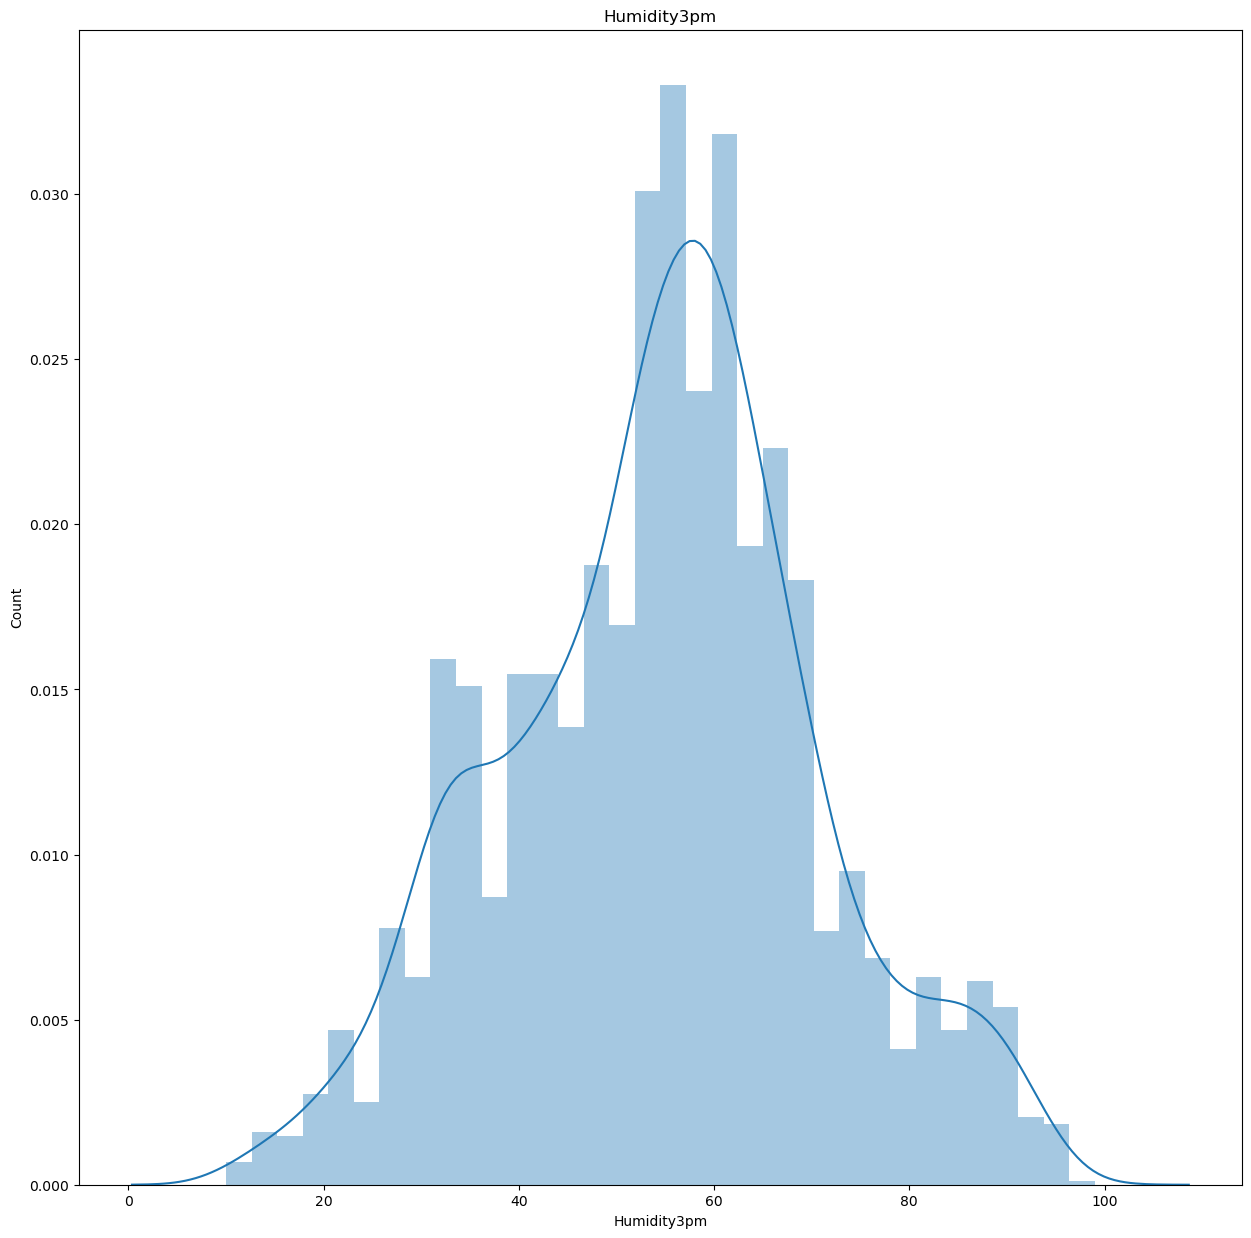

C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\2301530714.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


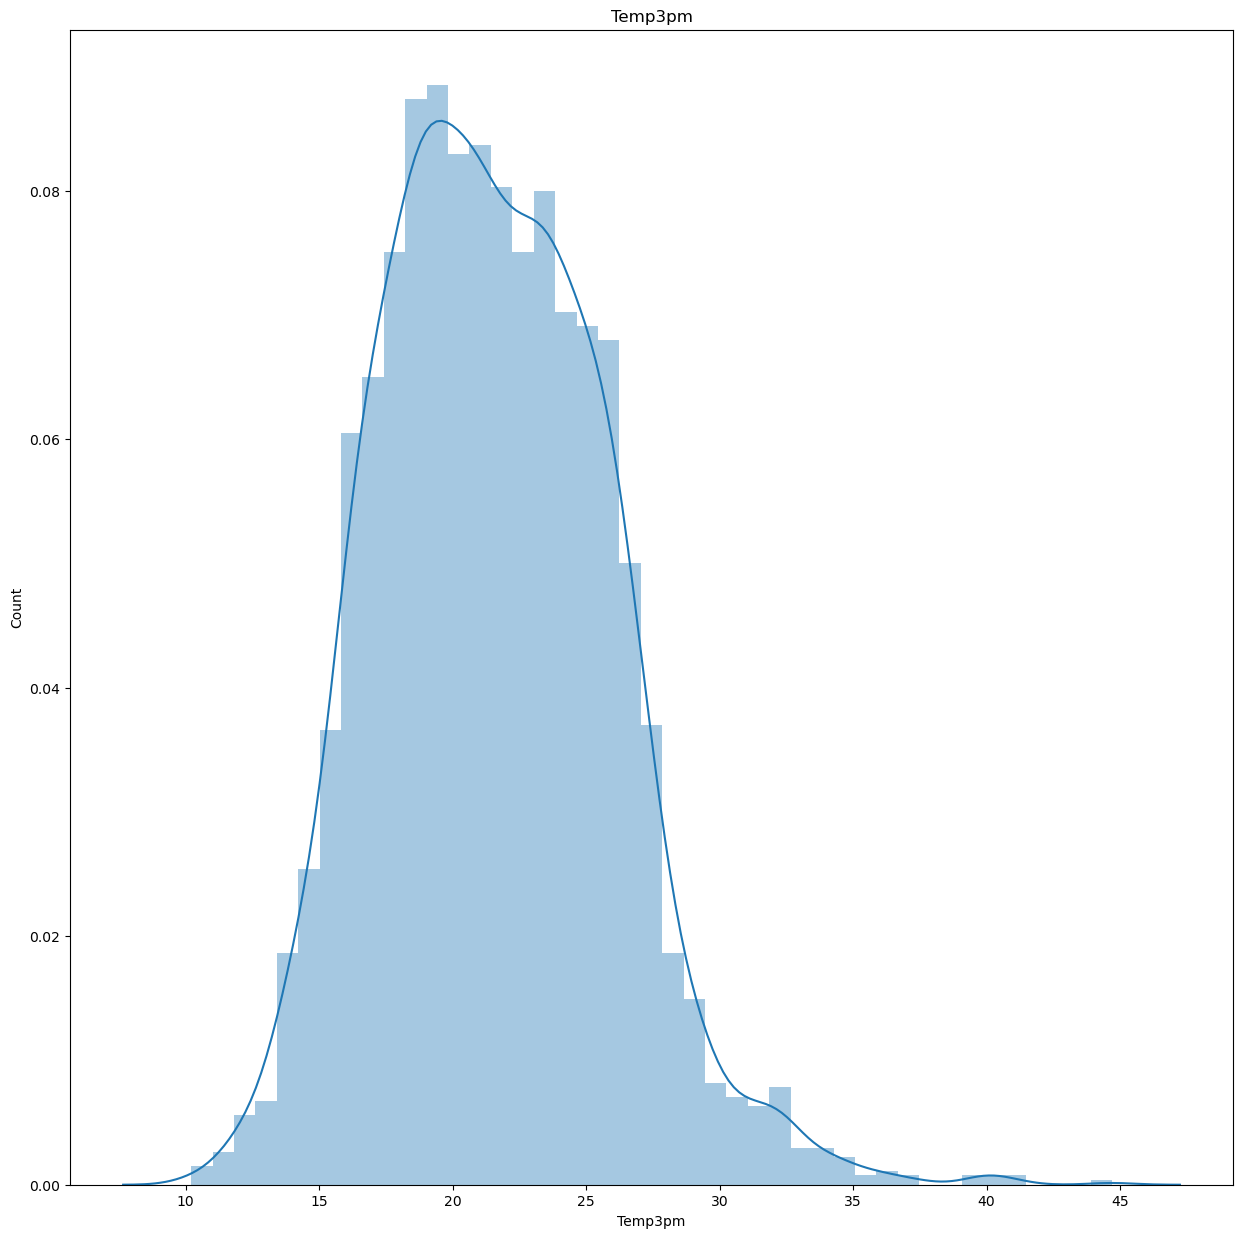

In [ ]:
# Plotting distribution plot-


for feature in continuous_feature:
    data = df.copy()
    plt.figure(figsize=(15, 15))


    sns.distplot(df[feature])

    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


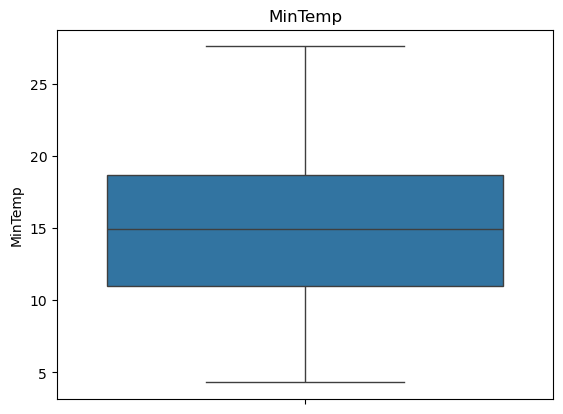

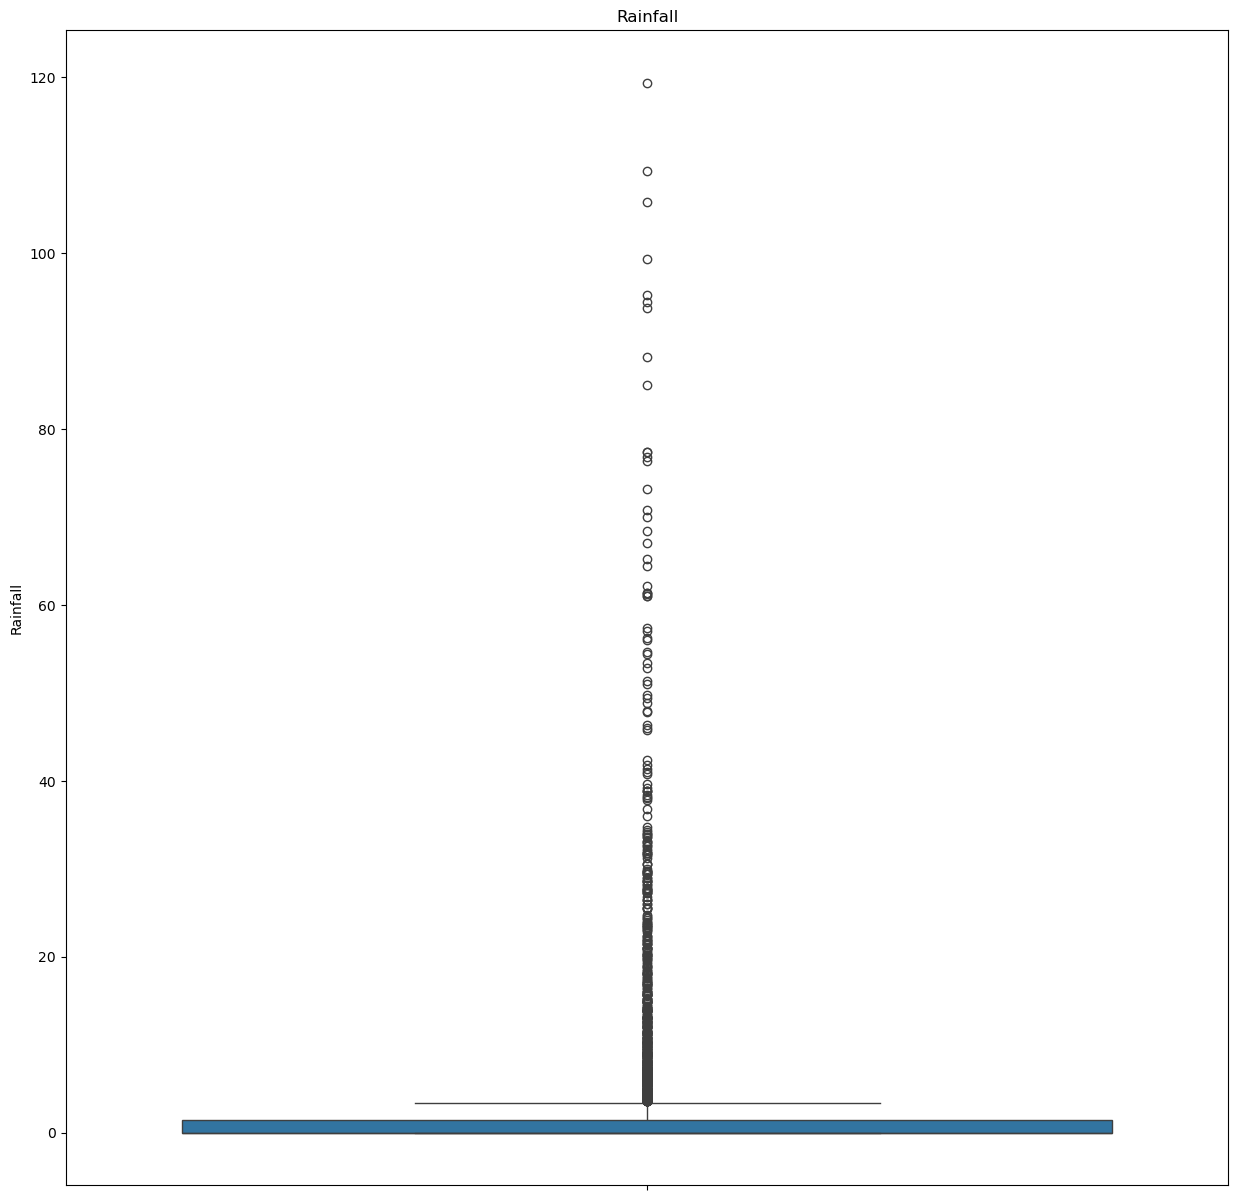

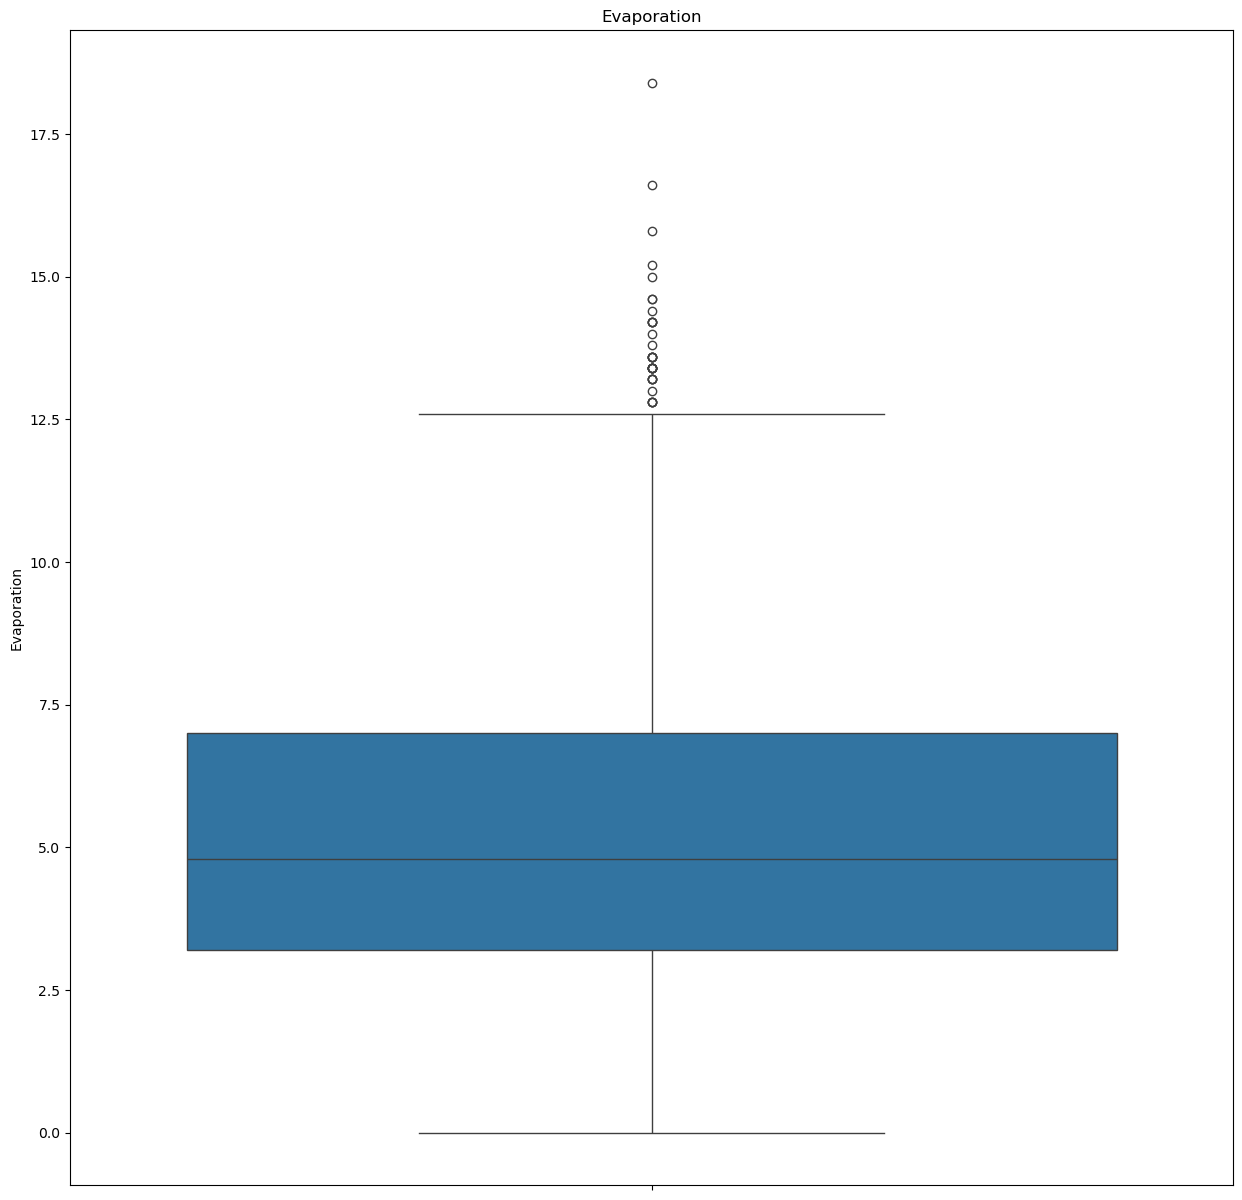

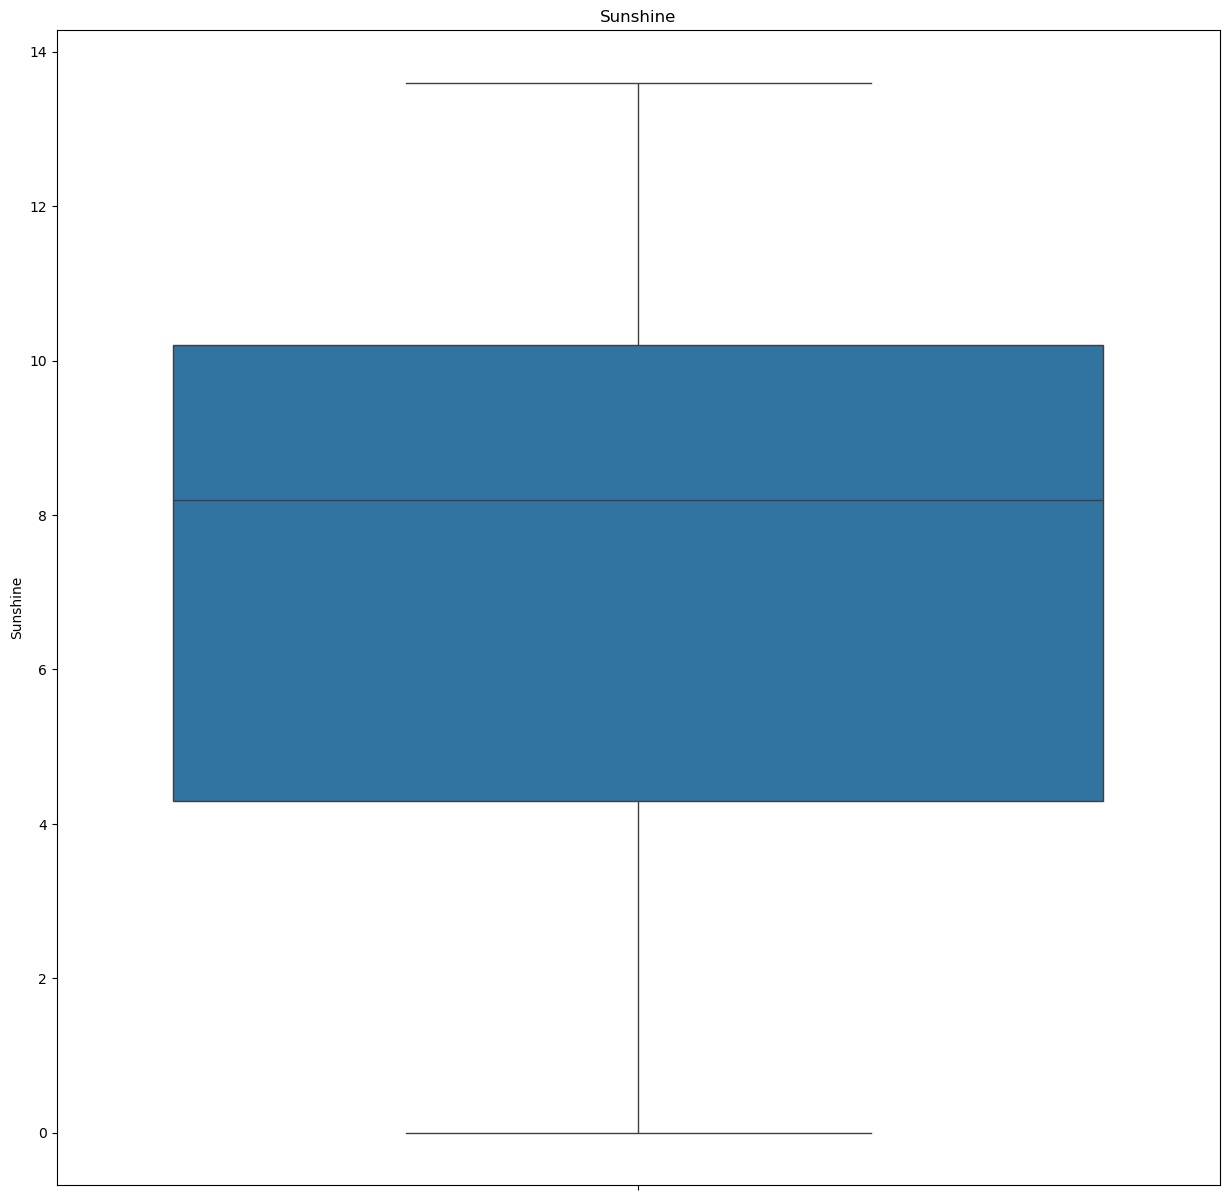

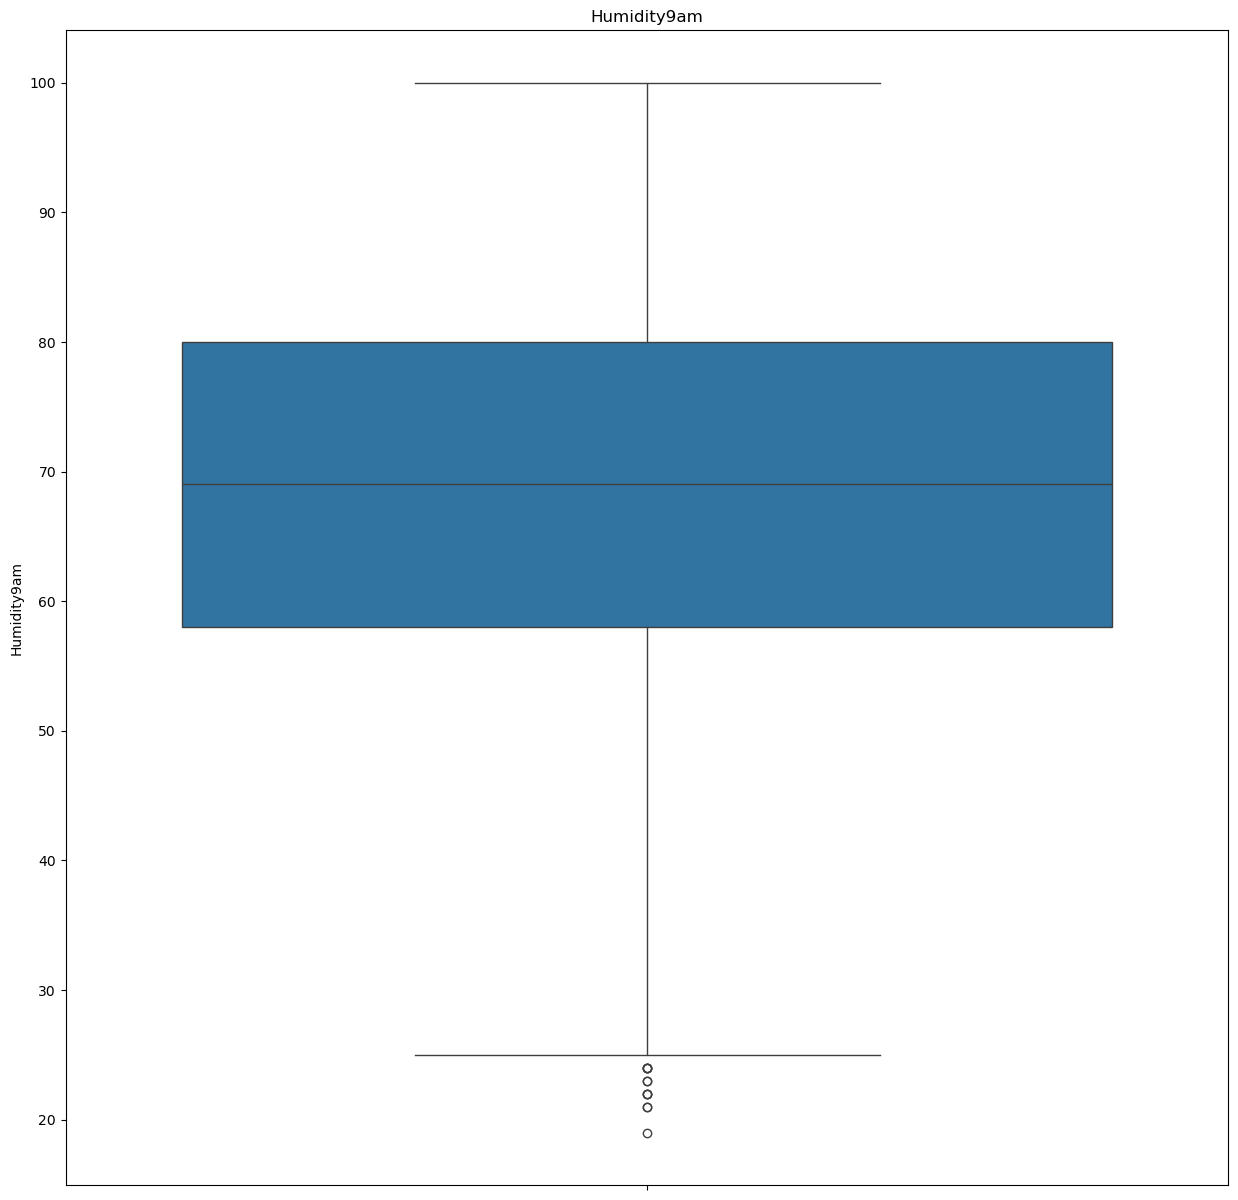

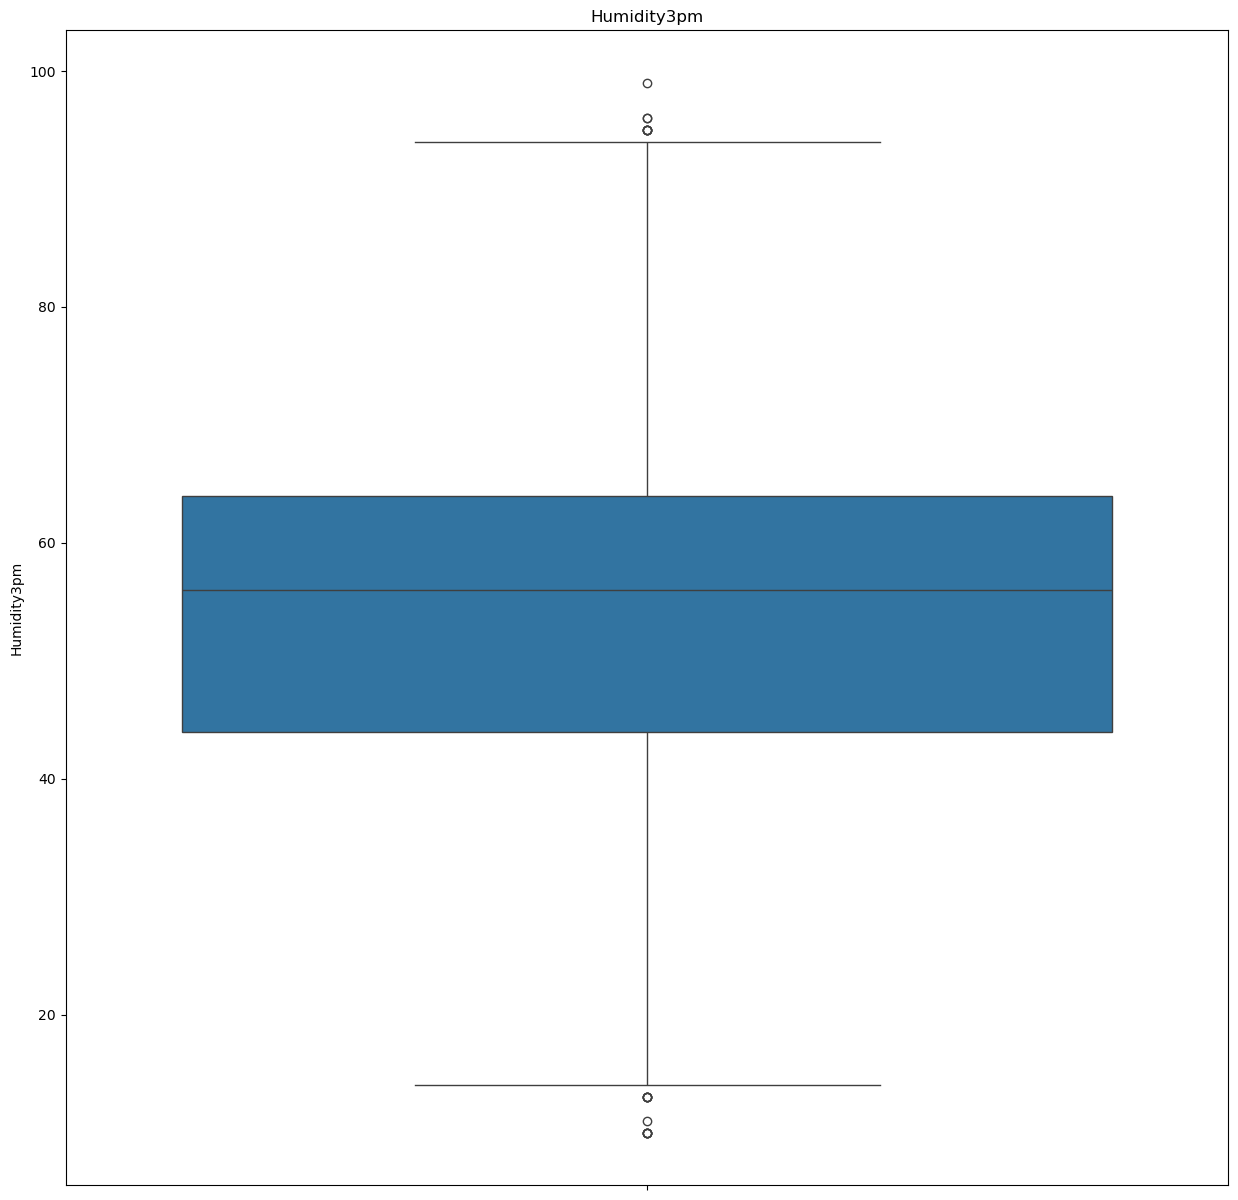

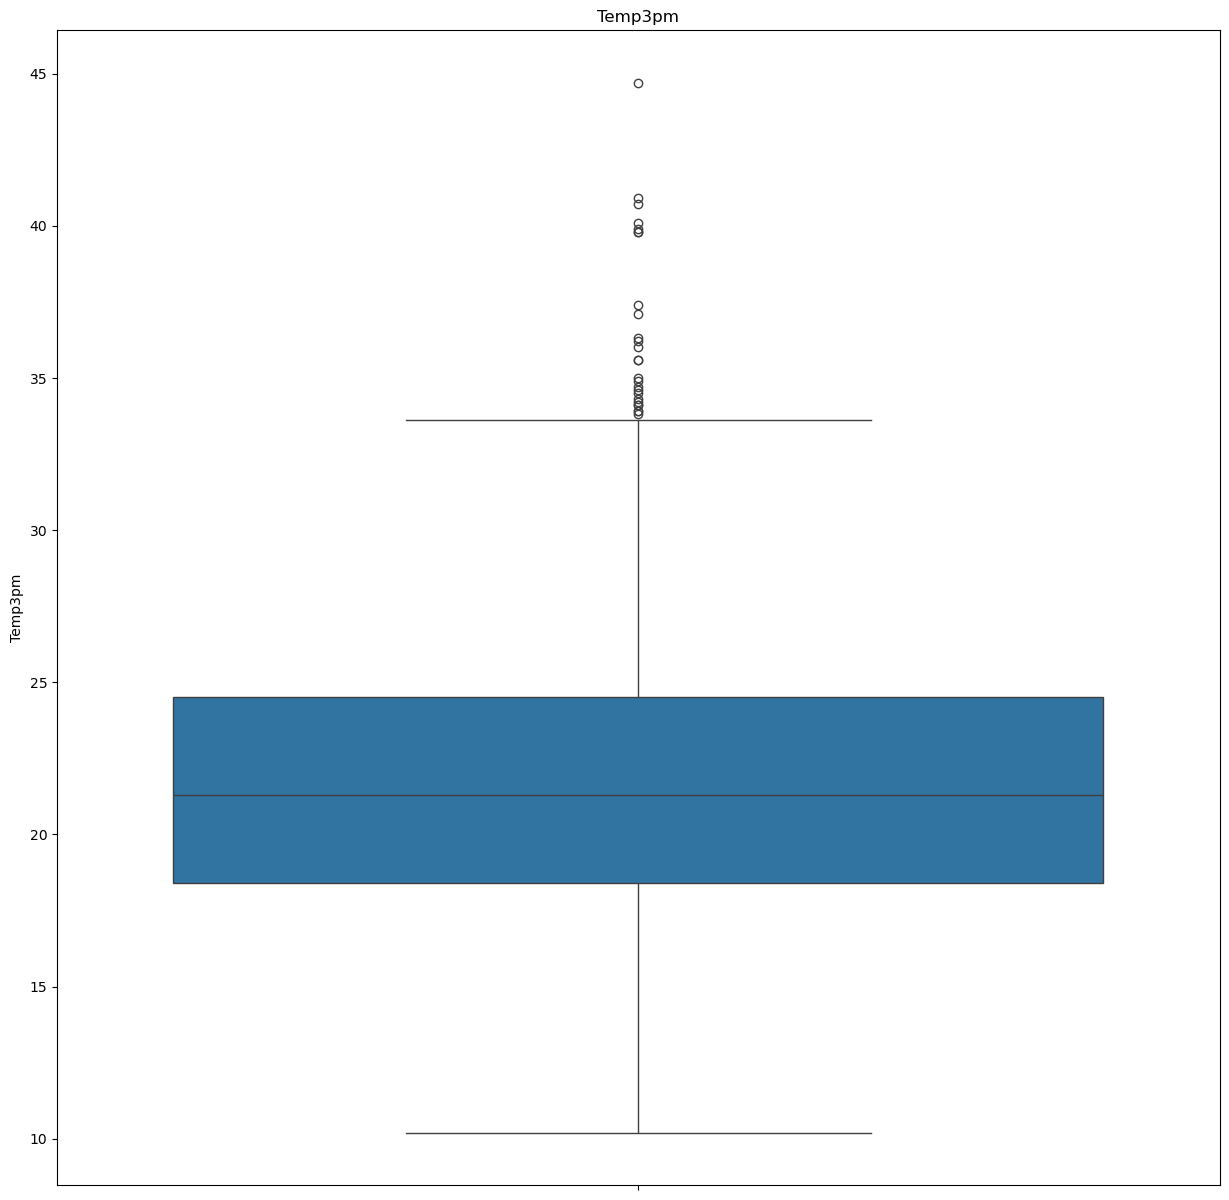

<Figure size 1500x1500 with 0 Axes>

In [ ]:
# Plotting Boxplot to identify outliers for contimuous features:
for feature in continuous_feature:
    data-df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

### Observation:

After analyzing the boxplot, I found that,there are outliers in "Rainfall","Evaporation","Sunshine","Humidity9am","Humidity3pm","Temp3pm" which can skew our analysis or modelling results and it can make significant impact on our analysis.

In [ ]:
df.describe()

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865057,3.330231,5.187432,7.179374,68.229010,54.699158,4.181523,4.218660,21.533333,0.259515,0.259215
min,2008-02-01 00:00:00,4.300000,0.000000,0.000000,0.000000,19.000000,10.000000,0.000000,0.000000,10.200000,0.000000,0.000000
25%,2010-05-15 00:00:00,11.000000,0.000000,3.200000,4.300000,58.000000,44.000000,2.000000,2.000000,18.400000,0.000000,0.000000
50%,2012-09-28 00:00:00,14.900000,0.000000,4.800000,8.200000,69.000000,56.000000,4.181523,4.218660,21.300000,0.000000,0.000000
75%,2015-03-14 00:00:00,18.700000,1.400000,7.000000,10.200000,80.000000,64.000000,7.000000,7.000000,24.500000,1.000000,1.000000
max,2017-06-25 00:00:00,27.600000,119.400000,18.400000,13.600000,100.000000,99.000000,9.000000,8.000000,44.700000,1.000000,1.000000
std,NaN,4.551593,9.886270,2.756095,3.801737,15.053668,16.261752,2.505491,2.409531,4.301156,0.438434,0.438269


#### Treating Rainfall feature

In [ ]:
# Finding 99 percentile value of the Rainfall features
nd.percentile(df.Rainfall,[99])

array([52.296])

In [ ]:
# fetchinf first value of this array
nd.percentile(df.Rainfall,[99][0])

52.29599999999982

In [ ]:
# Storing this value in a new variable
uv=nd.percentile(df.Rainfall,[99][0])

In [ ]:
# Identify the rows thta contain more than value of 99th percentile
df[df.Rainfall>uv]

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
4,2008-02-05,19.7,77.4,5.187432,0.000000,88.0,74.0,8.000000,8.00000,25.5,1,1
218,2008-09-06,11.8,62.2,5.187432,0.000000,92.0,88.0,8.000000,8.00000,12.3,1,1
633,2009-10-26,14.4,73.2,5.187432,0.000000,91.0,60.0,8.000000,8.00000,16.6,1,1
737,2010-02-07,20.2,77.4,7.400000,0.200000,95.0,86.0,7.000000,8.00000,23.8,1,1
743,2010-02-13,21.4,70.0,9.400000,0.300000,92.0,80.0,8.000000,8.00000,25.2,1,1
855,2010-06-05,12.5,61.4,1.000000,4.400000,80.0,67.0,5.000000,7.00000,17.4,1,0
1140,2011-03-20,18.8,99.4,5.187432,3.300000,92.0,81.0,4.181523,4.21866,22.2,1,1
1182,2011-05-31,13.9,65.2,5.187432,0.700000,81.0,62.0,4.181523,4.21866,19.6,1,1
1232,2011-07-20,8.7,76.8,5.187432,1.600000,91.0,83.0,4.181523,4.21866,15.0,1,1
1234,2011-07-22,11.3,88.2,5.187432,0.000000,88.0,95.0,4.181523,4.21866,11.5,1,1


In [ ]:
# Limit these values by capping & flooring
df.Rainfall[(df.Rainfall>1.3*uv)]=1.3*uv

C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\2246357664.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Rainfall[(df.Rainfall>1.3*uv)]=1.3*uv
C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\2246357664.py:2: SettingWithCopyWarni

#### Treating evaporation feature

In [ ]:
# Finding 99 percentile value of Rainfall feature and fetching the first value
nd.percentile(df.Evaporation,[99][0])

12.8

In [ ]:
# Storing this value in a new variable
uv=nd.percentile(df.Evaporation,[99][0])

In [ ]:
# Identifying that rows that conatain more then value of 99th percentile
df[(df.Evaporation>uv)]

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
349,2009-01-15,23.0,0.0,14.2,9.400000,61.0,39.0,4.181523,6.00000,33.1,0,1
357,2009-01-23,25.0,0.0,14.2,11.900000,59.0,58.0,1.000000,2.00000,29.1,0,0
359,2009-01-25,20.5,0.0,13.6,6.800000,57.0,51.0,7.000000,5.00000,24.7,0,0
373,2009-02-08,21.4,0.0,14.2,12.200000,69.0,53.0,0.000000,1.00000,28.1,0,0
642,2009-11-04,19.4,0.0,13.2,0.000000,71.0,76.0,8.000000,8.00000,19.1,0,0
661,2009-11-23,19.9,0.0,13.4,0.300000,62.0,68.0,7.000000,8.00000,20.4,0,0
686,2009-12-18,20.2,5.4,13.6,0.000000,87.0,83.0,8.000000,8.00000,18.5,1,1
722,2010-01-23,25.0,0.0,13.4,5.600000,28.0,17.0,5.000000,5.00000,39.9,0,1
1098,2011-02-06,27.6,0.0,16.6,2.600000,56.0,77.0,4.181523,4.21866,22.8,0,0
1400,2012-01-04,20.7,0.0,13.4,8.400000,69.0,59.0,4.181523,4.21866,27.8,0,0


#### Treating Humidity9am feature

In [ ]:
# Finding 1 percentile value value of Humidty9am feature and fetching the first value

nd.percentile(df.Humidity9am,[1][0])

30.0

In [ ]:
# storing this value in a new variable
lv=nd.percentile(df.Humidity9am,[1][0])

In [ ]:
# Identify the rows that contain the value more than the 99th percentile
df[(df.Humidity9am<lv)]

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
304,2008-12-01,17.6,0.0,7.6,10.9,29.0,21.0,3.000000,7.00000,30.8,0,0
571,2009-08-25,15.6,1.6,5.0,10.5,29.0,26.0,1.000000,1.00000,19.5,1,0
590,2009-09-13,17.3,0.0,8.2,10.9,24.0,17.0,0.000000,0.00000,31.9,0,0
603,2009-09-26,17.1,0.0,11.2,9.0,24.0,19.0,1.000000,3.00000,18.4,0,0
608,2009-10-01,14.9,0.0,7.0,10.8,21.0,10.0,3.000000,1.00000,32.8,0,0
667,2009-11-29,19.5,0.0,10.6,12.4,28.0,20.0,0.000000,5.00000,29.3,0,0
722,2010-01-23,25.0,0.0,13.4,5.6,28.0,17.0,5.000000,5.00000,39.9,0,1
1292,2011-09-18,15.7,0.0,6.8,10.5,27.0,59.0,4.181523,4.21866,21.9,0,0
1645,2012-09-05,11.1,0.0,5.2,10.6,28.0,13.0,1.000000,0.00000,27.5,0,0
1646,2012-09-06,18.4,0.0,13.4,10.7,28.0,10.0,0.000000,0.00000,27.6,0,0


#### Treating Humidity3pm feature

In [ ]:
# Finding 99 percenrile value of Humidity3pm feature and the fethcing the first value
nd.percentile(df.Humidity3pm,[99][0])


92.0

In [ ]:
# storing this value in a new variable
uv=nd.percentile(df.Humidity3pm,[99][0])


In [ ]:
# Identify the rows that contain the value more than the 99th percentile
df[(df.Humidity3pm>uv)]

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
361,2009-01-27,20.2,14.2000,1.800000,1.7,95.0,93.0,8.000000,8.00000,22.4,1,1
632,2009-10-25,17.9,0.0000,5.600000,1.1,72.0,94.0,7.000000,8.00000,16.5,0,1
736,2010-02-06,20.5,31.2000,5.000000,0.0,95.0,95.0,7.000000,8.00000,22.2,1,1
842,2010-05-23,9.5,14.2000,5.000000,0.4,91.0,93.0,7.000000,6.00000,14.3,1,1
845,2010-05-26,13.4,9.0000,2.200000,0.0,96.0,94.0,8.000000,8.00000,15.6,1,1
854,2010-06-04,15.2,26.4000,3.400000,0.0,85.0,94.0,7.000000,8.00000,16.4,1,1
1015,2010-11-15,22.3,0.0000,10.400000,0.0,70.0,95.0,4.181523,4.21866,19.4,0,1
1234,2011-07-22,11.3,67.9848,5.187432,0.0,88.0,95.0,4.181523,4.21866,11.5,1,1
1334,2011-10-30,18.1,0.0000,5.600000,8.1,75.0,99.0,4.181523,4.21866,21.6,0,0
1352,2011-11-17,15.9,12.8000,2.400000,0.0,93.0,94.0,4.181523,4.21866,17.9,1,1


In [ ]:
# Limit these value by capping and florring
df.Humidity3pm[(df.Humidity3pm>uv)]=uv

C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\4233883146.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Humidity3pm[(df.Humidity3pm>uv)]=uv
C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\4233883146.py:2: SettingWithCopyWarning

#### Treating Temp3pm feature

In [ ]:
# Finding 99 percentile value value of Temp3pm feature and fetching the first value

nd.percentile(df.Temp3pm,[99][0])

32.76399999999999

In [ ]:
# Storing this value in a new variable
uv=nd.percentile(df.Temp3pm,[99][0])

In [ ]:
# Identify the rows that contain the value more than the 99th percentile
df[(df.Temp3pm>uv)]

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
245,2008-10-03,22.5,0.0,8.6,9.8,41.00000,20.0,1.000000,7.00000,33.9,0,1
273,2008-10-31,16.9,0.2,3.2,5.0,53.00000,24.0,6.000000,7.00000,34.6,0,0
335,2009-01-01,18.4,0.0,9.8,12.9,73.00000,22.0,4.000000,6.00000,34.3,0,0
349,2009-01-15,23.0,0.0,14.2,9.4,61.00000,39.0,4.181523,6.00000,33.1,0,1
358,2009-01-24,24.8,0.0,10.6,11.1,55.00000,20.0,6.000000,2.00000,40.1,0,0
608,2009-10-01,14.9,0.0,7.0,10.8,21.00000,10.0,3.000000,1.00000,32.8,0,0
641,2009-11-03,18.9,0.0,6.2,11.0,73.00000,18.0,6.000000,6.00000,36.3,0,0
660,2009-11-22,21.2,0.0,7.4,6.0,75.00000,19.0,6.000000,7.00000,39.8,0,0
722,2010-01-23,25.0,0.0,13.4,5.6,28.00000,17.0,5.000000,5.00000,39.9,0,1
742,2010-02-12,23.9,0.0,9.0,9.8,71.00000,32.0,6.000000,7.00000,37.4,0,1


In [ ]:
# Limit these value by Capping and flooring
df.Temp3pm[(df.Temp3pm>1.2*uv)]=1.2*uv

C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\3598511977.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Temp3pm[(df.Temp3pm>1.2*uv)]=1.2*uv
C:\Users\itsme\AppData\Local\Temp\ipykernel_20760\3598511977.py:2: SettingWithCopyWarning

## Data Splitting into Dependent and Independent

In [ ]:
#Splitting the data into X and Y variable independent and dependent respectively
X=df.loc[:,df.columns !="RainTomorrow_Yes"]
X=X.loc[:,X.columns !="Date"]
Y=df["RainTomorrow_Yes"]

In [ ]:
#printing the first five rows of the  independent variable data
X.head()

,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes
0,19.5,15.6000,6.200000,0.0,92.0,84.0,8.0,8.0,20.9,1
1,19.5,6.0000,3.400000,2.7,83.0,73.0,7.0,7.0,24.8,1
2,21.6,6.6000,2.400000,0.1,88.0,86.0,7.0,8.0,23.0,1
3,20.2,18.8000,2.200000,0.0,83.0,90.0,8.0,8.0,20.9,1
4,19.7,67.9848,5.187432,0.0,88.0,74.0,8.0,8.0,25.5,1


In [ ]:
#printing the first five rows of the  dependent variable data
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow_Yes, dtype: int32

## Scaling or Standardizing our data

In [ ]:
from sklearn import preprocessing

In [ ]:
# Creating scaler object which will store the scaling information of our X train variable

scaler = preprocessing.StandardScaler().fit(X)

In [ ]:
# Transform our X into X_scale

X_scaled = scaler.transform(X)

## Data splitting in Test-Train

In [ ]:
# Importing test - train fuction from sklearn

from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into train and test dataset

X_train, X_test, Y_train, Y_test = train_test_split (X_scaled, Y, test_size = 0.2, random_state = 42)

In [ ]:
# checking shape of training data set

X_train.shape, Y_train.shape

((2669, 10), (2669,))

In [ ]:
# checking shape of test data set

X_test.shape, Y_test.shape

((668, 10), (668,))

## Model Selection
Logistic Regression: Simple and easy to understand, making it a good starting point.Well-suited for tasks where you need to predict two outcomes (binary classification).

Linear Discriminant Analysis (LDA): Effective for classification tasks, especially when dealing with multiple classes.Useful when you have more than two classes to predict.

K-Nearest Neighbors (KNN): Intuitive and easy to implement, especially for smaller datasets.Handy when you want to classify a data point based on the majority class of its neighbors.

Decision Trees: Great for capturing complex relationships in the data.Useful when you want a clear, visual representation of decision-making processes.

Random Forest: Builds on Decision Trees, providing improved accuracy and robustness.Effective when dealing with larger datasets and complex relationships.

Gradient Boosting: Powerful for boosting model performance by combining weak learners.Particularly effective for large-scale datasets, offering high accuracy.

XG Boost: An optimized form of Gradient Boosting, known for speed and performance.Often preferred in competitions and for tasks like image classification.

In summary, Logistic Regression is straightforward and good for binary tasks, Decision Trees and Random Forests handle complexity well, and Gradient Boosting (including XGBoost) excels in accuracy, especially for large datasets. The choice depends on the specific characteristics and goals of your classification problem.


## Logistics Regression

In [ ]:
# Importing Logistic Regression from Sklearn

from sklearn.linear_model import LogisticRegression

In [ ]:
# Creating an object for our model

clf_LR = LogisticRegression()

In [ ]:
# Fitting our model over in Train data set

clf_LR.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Predicting value using our model over the test dat
Y_pred_LR=clf_LR.predict(X_test)

In [ ]:
# Calculatting Accuracy score,Precision score,Recall score
print("Accuracy score,logistic regression:",accuracy_score(Y_test,Y_pred_LR))
print("Precision score,logistic regression:",precision_score(Y_test,Y_pred_LR))
print("Recall score,logistic regression:",recall_score(Y_test,Y_pred_LR))

Accuracy score,logistic regression: 0.8233532934131736
Precision score,logistic regression: 0.7426470588235294
Recall score,logistic regression: 0.5489130434782609


In [ ]:
# Now calculating and displaying the confusion matrix
confusion_matrix(Y_test,Y_pred_LR)

array([[449,  35],
       [ 83, 101]], dtype=int64)

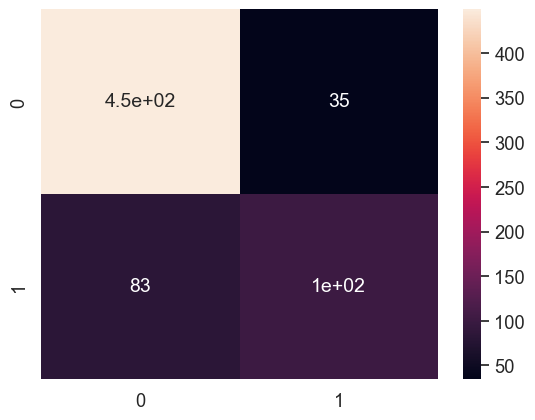

In [ ]:
#Plotting the confusion matrix
df_cm=pd.DataFrame(confusion_matrix(Y_test,Y_pred_LR),range(2),range(2))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm,annot=True,annot_kws={"size":14})  # font size
plt.show()

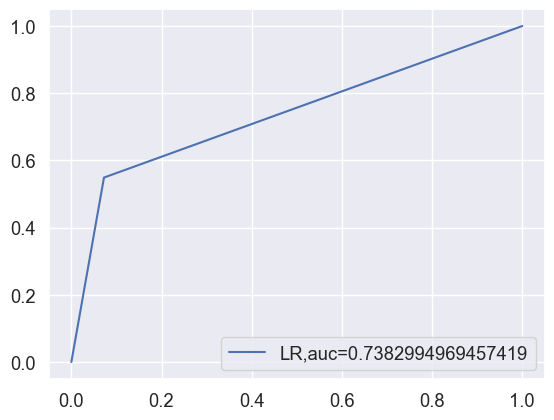

In [ ]:
# plotting the ROC curve

fpr,tpr,_=metrics.roc_curve(Y_test,Y_pred_LR)
auc=metrics.roc_auc_score(Y_test,Y_pred_LR) #Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR,auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Model Interpretation

 The performance metrics for our logistic regression model in simpler terms:

**Accuracy Score (0.8248):** This score, around 82.48%, means our model gets it right for about 82.48% of the cases in our dataset. It's like an overall grade for the model.

**Precision Score (0.7445):** With a precision score of 74.45%, when the model predicts something positive, it's correct about 74.45% of the time. It tells us how accurate the model is when it makes positive predictions.

**Recall Score (0.5543):** The recall score of 55.43% means the model catches about 55.43% of all the actual positive cases. It shows how well the model finds positive instances.

**ROC AUC Score (0.7410):** The ROC AUC score of 0.7410 measures how well the model can tell the difference between positive and negative cases. A value of 0.7410 indicates the model does reasonably well in this task.

In simpler terms, the model is about 82.48% correct overall, when it says something positive, it's right about 74.45% of the time, it catches around 55.43% of actual positive cases, and it's decent at distinguishing between positive and negative cases.

### Linear Discriminant Analysis(LDA)

In [ ]:
# import LDA from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Creating an object for LDA
clf_LDA=LinearDiscriminantAnalysis()

In [ ]:
# Fitting our model over the Train dataset
clf_LDA.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Prdicting the value using our model over test dat
Y_pred_LDA=clf_LDA.predict(X_test)

In [ ]:
# Calculatting Accuracy score,Precision score,Recall score
print("Accuracy score,logistic regression:",accuracy_score(Y_test,Y_pred_LDA))
print("Precision score,logistic regression:",precision_score(Y_test,Y_pred_LDA))
print("Recall score,logistic regression:",recall_score(Y_test,Y_pred_LDA))


Accuracy score,logistic regression: 0.8203592814371258
Precision score,logistic regression: 0.7133333333333334
Recall score,logistic regression: 0.5815217391304348


In [ ]:
# Clculating and displaying the confusion matrix
confusion_matrix(Y_test,Y_pred_LDA)

array([[441,  43],
       [ 77, 107]], dtype=int64)

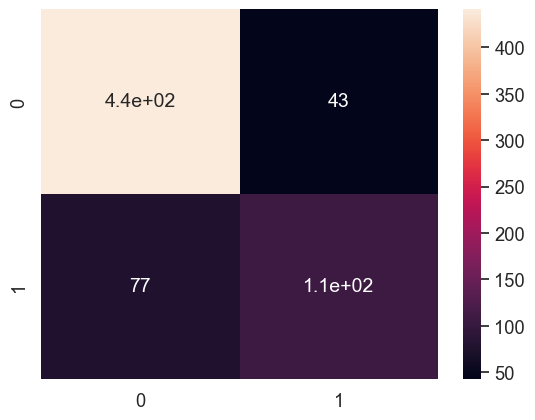

In [ ]:
# Plotting the confusion matrix
df_cm_lda = pd.DataFrame(confusion_matrix(Y_test, Y_pred_LDA), range(2), range(2))
sns.set(font_scale= 1.2) # for label size
sns.heatmap(df_cm_lda, annot=True, annot_kws={"size": 14}) # font size

plt.show()

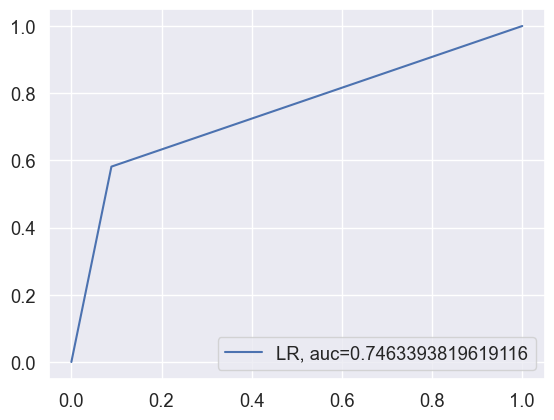

In [ ]:
# Plotting the ROC curve
fpr,tpr,_=metrics.roc_curve(Y_test,Y_pred_LDA)
auc = metrics.roc_auc_score(Y_test, Y_pred_LDA) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Model Interpretation:

The performance metrics for our LDA model:

Accuracy Score (0.8204): This score, about 82.04%, means our LDA model gets it right for approximately 82.04% of the cases in our dataset. It's like an overall grade for the model.

Precision Score (0.7133): With a precision score of 71.33%, when the LDA model predicts something positive, it's correct about 71.33% of the time. It tells us how accurate the model is when it makes positive predictions.

Recall Score (0.5815): The recall score of 58.15% means the LDA model catches about 58.15% of all the actual positive cases. It shows how well the model finds positive instances, which is crucial when missing positive cases is a concern.

ROC AUC Score (0.7463): The ROC AUC score of 0.7463 measures how well the LDA model can distinguish between positive and negative cases. A score of 0.7463 suggests the model performs reasonably well in this task.

In simpler terms, the model is about 82.04% correct overall, when it predicts something positive, it's right about 71.33% of the time, it catches around 58.15% of actual positive cases, and it's good at distinguishing between positive and negative cases.



### KNN(K-Nearest Neighbour)

In [ ]:
# Creating an object for scaling our data:
scaler=preprocessing.StandardScaler().fit(X_train)

In [ ]:
# Storing scaling properties in X_train_s over X_train

X_train_s = scaler.transform(X_train)

In [ ]:
# Storing scaling properties in X_test_s over X_test

X_test_s = scaler.transform(X_test)

In [ ]:
# Importing KNeighborsClassifier from sklearn

from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Creating an object for KNN classifier with neighbor value 1.

clf_knn_1 = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
# Fitting our model over Train data set

clf_knn_1.fit(X_train_s, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Predicting value using KNN Model over X_test_s

Y_pred_knn = clf_knn_1.predict(X_test_s)

In [ ]:
# Calculating Accuracy score, Precision score, Recall score and printing them.

print("Accuracy score for KNN:",accuracy_score(Y_test, Y_pred_knn))
print("Precision score for KNN:", precision_score(Y_test, Y_pred_knn))
print("Recall score for KNN:", recall_score(Y_test, Y_pred_knn))

Accuracy score for KNN: 0.7829341317365269
Precision score for KNN: 0.6054054054054054
Recall score for KNN: 0.6086956521739131


In [ ]:
# Calulating and displaying confusion matrix

confusion_matrix(Y_test, Y_pred_knn)

array([[411,  73],
       [ 72, 112]], dtype=int64)

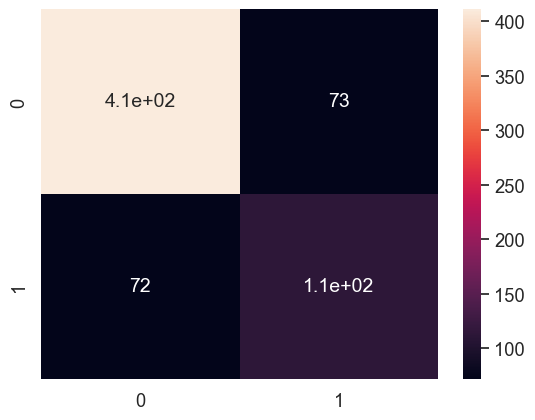

In [ ]:
# Plotting confusion matrix

df_cm_knn = pd.DataFrame(confusion_matrix(Y_test, Y_pred_knn), range(2), range(2))
sns.set(font_scale= 1.2) # for label size
sns.heatmap(df_cm_knn, annot=True, annot_kws={"size": 14}) # font size

plt.show()

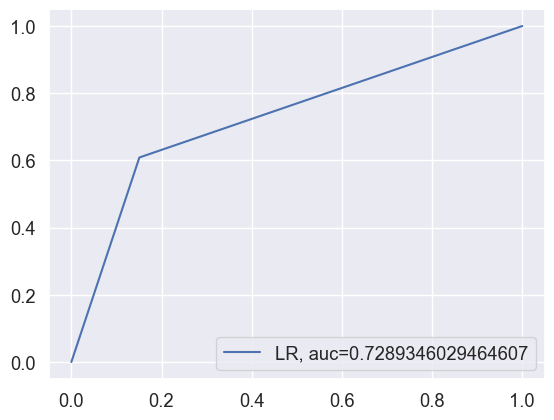

In [ ]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_knn)
auc = metrics.roc_auc_score(Y_test, Y_pred_knn) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## KNN using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating KNN model regressor object

clf_knn = KNeighborsClassifier(n_jobs = -1)

In [ ]:
# Creating params dictionary

params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

In [ ]:
# Creating model object using grid search

grid_search = GridSearchCV(clf_knn, params)

In [ ]:
# Fitting knn model(Using grid search) over Train data set

grid_search.fit(X_train_s, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
# Accessing best param value using grid search attribute

grid_search.best_params_

{'n_neighbors': 10}

In [ ]:
# Accessing best estimator using grid search attribute & stroring it in an object

clf_knn_best = grid_search.best_estimator_

In [ ]:
# Predicting value using our new KNN model

Y_pred_best = clf_knn_best.predict(X_test_s)

In [ ]:
# Showing confusion matrix using true value and predicted value

confusion_matrix(Y_test, Y_pred_best)

array([[454,  30],
       [ 95,  89]], dtype=int64)

In [ ]:
# Calculating Accuracy score, Precision score, Recall score and printing them.

print("Accuracy score for grid KNN:",accuracy_score(Y_test, Y_pred_best))
print("Precision score for grid KNN:", precision_score(Y_test, Y_pred_best))
print("Recall score for grid KNN:", recall_score(Y_test, Y_pred_best))

Accuracy score for grid KNN: 0.812874251497006
Precision score for grid KNN: 0.7478991596638656
Recall score for grid KNN: 0.483695652173913


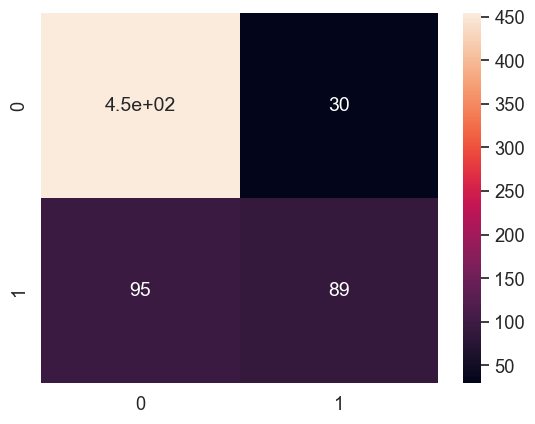

In [ ]:
# Plotting confusion matrix

df_cm_knn_best = pd.DataFrame(confusion_matrix(Y_test, Y_pred_best), range(2), range(2))
sns.set(font_scale= 1.2) # for label size
sns.heatmap(df_cm_knn_best, annot=True, annot_kws={"size": 14}) # font size

plt.show()

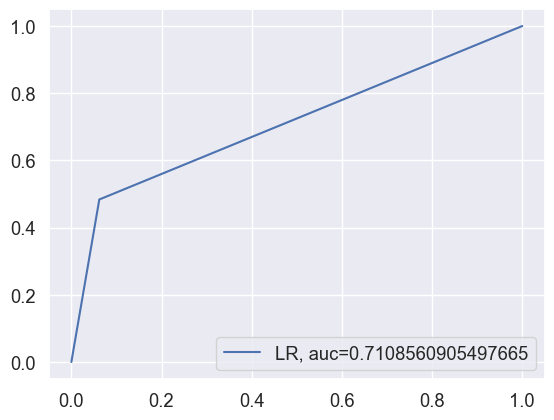

In [ ]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_best)
auc = metrics.roc_auc_score(Y_test, Y_pred_best) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Model Interpretation:

When we use grid search to find the best number of neighbors for the KNN model (trying values from 1 to 10), we see some changes in performance:

Accuracy and Precisi on: They both improve, meaning the model is getting better at overall correctness and accuracy when it predicts positive cases.

Recall: Unfortunately, recall decreases. Recall is about how well the model catches actual positive cases.

Choosing the best number of neighbors depends on what's most important for our classification task. Here are two scenarios:

If our main goal is to catch as many positive cases as possible (high recall): In this case, we might prefer the KNN model with n_neighbors=1, even though it could lead to some false positives.

If we need a high level of overall correctness and precision, and we can accept missing some positive cases (lower recall): In this situation, the Grid Search KNN model with n_neighbors=10 might be the better choice.

So, the decision on the best model depends on the specific use case and what balance we want between precision, recall, and overall accuracy.



### Decision Tree Classifier

In [ ]:
#Importing tree from sklearn

from sklearn import tree

In [ ]:
# Creating an model object of Decison tree classifier

clf_tree = tree.DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [ ]:
# Fitting our model over train data set

clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Predicting value using our model over X_test

Y_pred_tree = clf_tree.predict(X_test)

In [ ]:
# Calculating Accuracy score, Precision score, Recall score and printing them.

print("Accuracy score for Decision tree:",accuracy_score(Y_test, Y_pred_tree))
print("Precision score for Decision tree:", precision_score(Y_test, Y_pred_tree))
print("Recall score for Decision tree:", recall_score(Y_test, Y_pred_tree))

Accuracy score for Decision tree: 0.8023952095808383
Precision score for Decision tree: 0.6625
Recall score for Decision tree: 0.5760869565217391


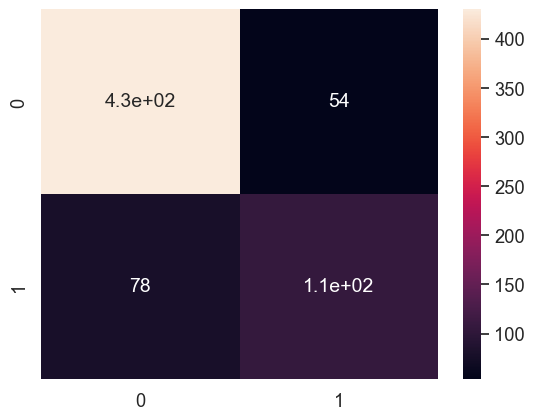

In [ ]:

# Plotting confusion matrix

df_cm_tree = pd.DataFrame(confusion_matrix(Y_test, Y_pred_tree), range(2), range(2))
sns.set(font_scale= 1.2) # for label size
sns.heatmap(df_cm_tree, annot=True, annot_kws={"size": 14}) # font size

plt.show()

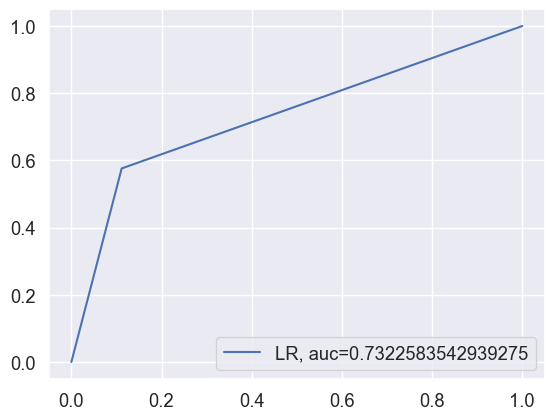

In [ ]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_tree)
auc = metrics.roc_auc_score(Y_test, Y_pred_tree) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
pip install pydotplus graphviz

In [ ]:
# Importing image from ipython.display, We will use this image to display graph in our python notebook.

from IPython.display import Image

In [ ]:
# Importing pydotplus which will help in importing the graph

import pydotplus

In [ ]:
# Creating dot file.

dot_data = tree.export_graphviz(clf_tree, out_file = None, filled = True)

In [ ]:
# Importing graph from dot data file

graph = pydotplus.graph_from_dot_data(dot_data)

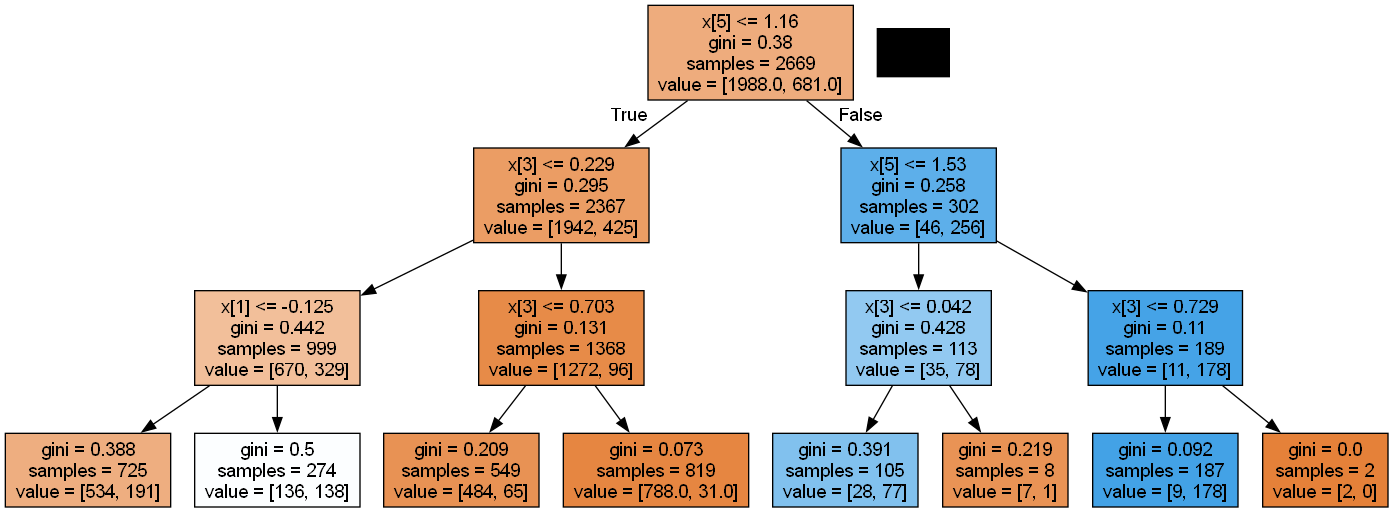

In [ ]:
 # Displaying graph

Image(graph.create_png())

## Model Interpretation

Accuracy Score (0.8024): This score, around 80.24%, means that the model gets it right for about 80.24% of our data. It's like an overall grade for the model.

Precision Score (0.6625): With a precision score of 66.25%, when the model says something positive, it's right about 66.25% of the time. It tells us how good the model is at being accurate when it makes positive predictions.

Recall Score (0.5761): The recall score of 57.61% means that the model catches about 57.61% of all the actual positive cases. It shows how well the model finds positive instances.

ROC AUC Score (0.7323): The ROC AUC score of 0.7323 measures how well the model can tell the difference between positive and negative cases. A score of 0.7323 suggests the model does reasonably well in this task.

In simpler terms, the model is about 80.24% correct overall, when it says something positive, it's right about 66.25% of the time, it catches around 57.61% of actual positive cases, and it's decent at distinguishing between positive and negative cases.

### Random Forest Classifier

In [ ]:
# Importing Random forest Classifier from sklearn

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating model object

clf_rf = RandomForestClassifier(n_jobs = -1, random_state = 42, max_depth = 3)

In [ ]:
# Fitting our model over train data set

clf_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [ ]:
# Predicitng value using our model over test data set

y_pred_rf = clf_rf.predict(X_test)

In [ ]:
# Calculating Accuracy score, Precision score, Recall score and printing them.

print("Accuracy score for Random forest:",accuracy_score(Y_test, y_pred_rf))
print("Precision score for Random forest:", precision_score(Y_test, y_pred_rf))
print("Recall score for Random forest:", recall_score(Y_test, y_pred_rf))

Accuracy score for Random forest: 0.8248502994011976
Precision score for Random forest: 0.8018018018018018
Recall score for Random forest: 0.483695652173913


In [ ]:
# Showing confusion matrix

confusion_matrix(Y_test, y_pred_rf)

array([[462,  22],
       [ 95,  89]], dtype=int64)

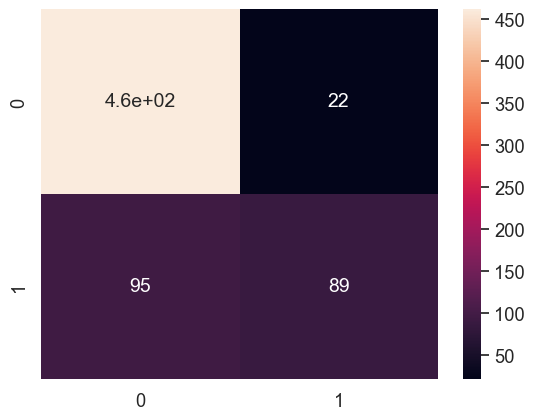

In [ ]:
# Plotting confusion matrix

df_cm_rf = pd.DataFrame(confusion_matrix(Y_test, y_pred_rf), range(2), range(2))
sns.set(font_scale= 1.2) # for label size
sns.heatmap(df_cm_rf, annot=True, annot_kws={"size": 14}) # font size

plt.show()

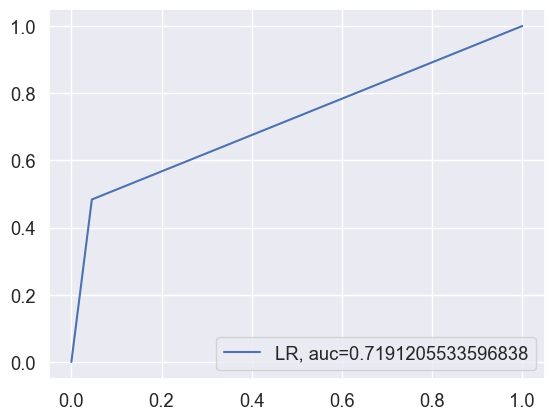

In [ ]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_rf)
auc = metrics.roc_auc_score(Y_test, y_pred_rf) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random forest-Using Grid search

In [ ]:
# Creating model Object

clf_rf_2 = RandomForestClassifier()

In [ ]:
# Creating param grid / hyperperameter for grid search

params_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf' : [1,3,5]
}

In [ ]:
# Performing grid search and storing in a model object

grid_search_rf = GridSearchCV(clf_rf_2, params_rf, cv = 5)

In [ ]:
# Training our model over train data set

grid_search_rf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 500]})

In [ ]:
# finding best param value using grid search attribute

grid_search_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 500}

In [ ]:
# finding best estimator using grid search attribute

clf_rf_best = grid_search_rf.best_estimator_

In [ ]:
# Prediciting value using our model over X_test

Y_pred_rf_best = clf_rf_best.predict(X_test)

In [ ]:
# Calculating Accuracy score, Precision score, Recall score and printing them.

print("Accuracy score for Random forest using grid_search:",accuracy_score(Y_test, Y_pred_rf_best))
print("Precision score for Random forest using grid_search:", precision_score(Y_test, Y_pred_rf_best))
print("Recall score for Random forest using grid_search:", recall_score(Y_test, Y_pred_rf_best))

Accuracy score for Random forest using grid_search: 0.8218562874251497
Precision score for Random forest using grid_search: 0.7559055118110236
Recall score for Random forest using grid_search: 0.5217391304347826


In [ ]:
# Printing Confusion matrix

confusion_matrix(Y_test, Y_pred_rf_best)

array([[453,  31],
       [ 88,  96]], dtype=int64)

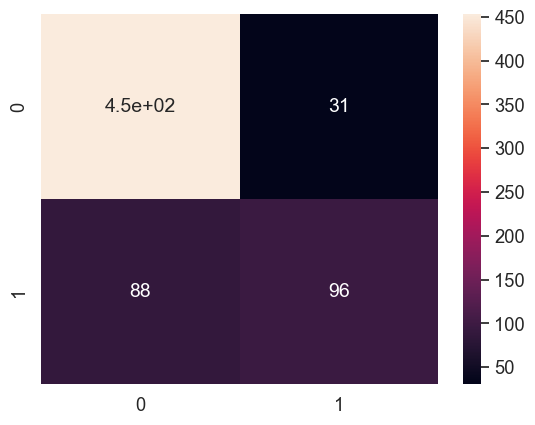

In [ ]:
# Plotting confusion matrix

df_cm_rf_best = pd.DataFrame(confusion_matrix(Y_test, Y_pred_rf_best), range(2), range(2))
sns.set(font_scale= 1.2) # for label size
sns.heatmap(df_cm_rf_best, annot=True, annot_kws={"size": 14}) # font size

plt.show()

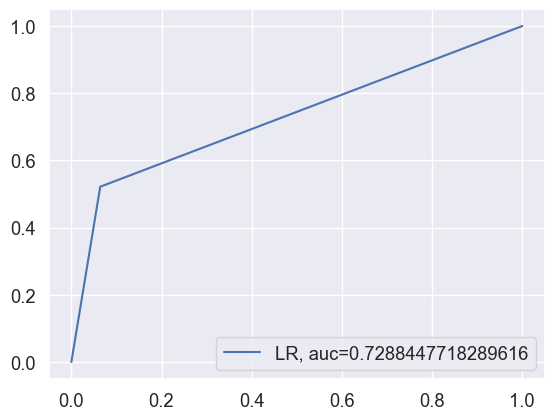

In [ ]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_rf_best)
auc = metrics.roc_auc_score(Y_test, Y_pred_rf_best) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Model Interpretation:

**Random Forest Model (Without Grid Search):**

* Accuracy: 82.49%
* Precision: 80.18%
* Recall: 48.37%
* ROC AUC Score: 71.91%

**Random Forest Model (With Grid Search):**

* Accuracy: 81.89%
* Precision: 74.05%
* Recall: 52.72%
* ROC AUC Score: 72.85%

The Random Forest model without grid search has a bit higher accuracy and precision, but a lower recall and ROC AUC score compared to the Random Forest model with grid search.

To decide which model is better for our task, we need to consider our specific goals and the trade-offs between different performance metrics:

If we care more about overall accuracy and precision and are okay with a lower recall, then the Random Forest model without grid search might be the better choice.

If having a higher recall and ROC AUC score is crucial, and we can tolerate a small drop in accuracy and precision, then the Random Forest model with grid search might be the preferred option.


## Gradient Boosting Classifier

In [ ]:
# Importing Gradient Boosting Classifier from sklearn

from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Creating model object

clf_gbc = GradientBoostingClassifier()

In [ ]:
# Fitting our gbc model over train data set

clf_gbc.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
# Predicitng value using gbc model over X_test

Y_pred_gbc = clf_gbc.predict(X_test)

In [ ]:
# Calculating Accuracy score, Precision score, Recall score and printing them.

print("Accuracy score for Gradient Boosting classifier:",accuracy_score(Y_test, Y_pred_gbc))
print("Precision score for Gradient Boosting classifier:", precision_score(Y_test, Y_pred_gbc))
print("Recall score for Gradient Boosting classifier:", recall_score(Y_test, Y_pred_gbc))

Accuracy score for Gradient Boosting classifier: 0.8263473053892215
Precision score for Gradient Boosting classifier: 0.7428571428571429
Recall score for Gradient Boosting classifier: 0.5652173913043478


In [ ]:
# Printing confusion matrix

confusion_matrix(Y_test, Y_pred_gbc)

array([[448,  36],
       [ 80, 104]], dtype=int64)

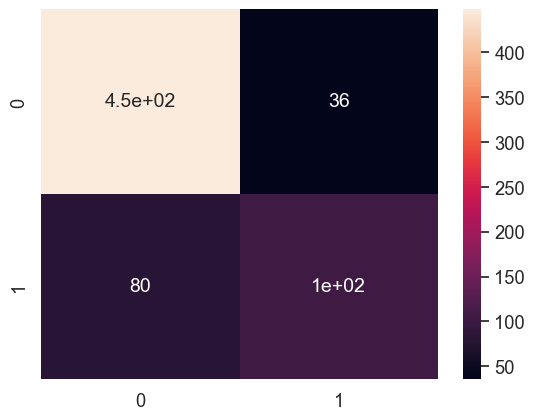

In [ ]:
# Plotting confusion matrix

df_cm_gbc = pd.DataFrame(confusion_matrix(Y_test, Y_pred_gbc), range(2), range(2))
sns.set(font_scale= 1.2) # for label size
sns.heatmap(df_cm_gbc, annot=True, annot_kws={"size": 14}) # font size

plt.show()

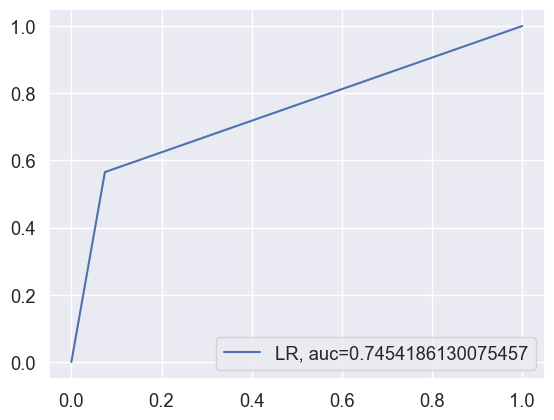

In [ ]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_gbc)
auc = metrics.roc_auc_score(Y_test, Y_pred_gbc) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### ADA Boostting Classifier

In [ ]:

# Importing Ada boost from sklearn

from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Creating Model object

clf_ada = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

In [ ]:
# Fitting our model over Train data set
clf_ada.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [ ]:
# Predcitng value using our model

Y_pred_ada = clf_ada.predict(X_test)

In [ ]:
# Calculating Accuracy score, Precision score, Recall score and printing them.

print("Accuracy score for Ada Boost:",accuracy_score(Y_test, Y_pred_ada))
print("Precision score for Ada Boost:", precision_score(Y_test, Y_pred_ada))
print("Recall score for Ada Boost:", recall_score(Y_test, Y_pred_ada))

Accuracy score for Ada Boost: 0.8263473053892215
Precision score for Ada Boost: 0.765625
Recall score for Ada Boost: 0.532608695652174


In [ ]:
# Displaying Confusion matrix

confusion_matrix(Y_test, Y_pred_ada)

array([[454,  30],
       [ 86,  98]], dtype=int64)

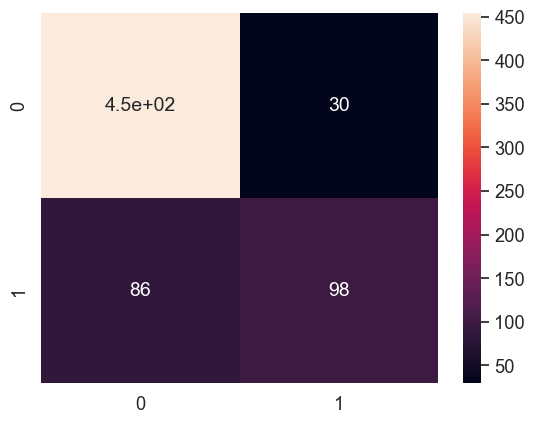

In [ ]:
# Plotting confusion matrix

df_cm_ada = pd.DataFrame(confusion_matrix(Y_test, Y_pred_ada), range(2), range(2))
sns.set(font_scale= 1.2) # for label size
sns.heatmap(df_cm_ada, annot=True, annot_kws={"size": 14}) # font size

plt.show()

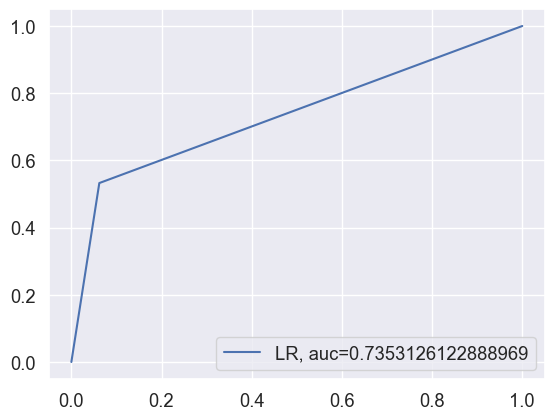

In [ ]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_ada)
auc = metrics.roc_auc_score(Y_test, Y_pred_ada) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### ADA Boost using estimator Random Forest

In [ ]:
# Creating model onject with estimator Random Forest Classifier

clf_ada2 = AdaBoostClassifier(clf_rf, learning_rate = 0.05, n_estimators = 500)

In [ ]:
# Fitting our model over Training Data set

clf_ada2.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=3, n_jobs=-1,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [ ]:
# Predicting value using our model

Y_pred_ada2 = clf_ada2.predict(X_test)

In [ ]:
# Calculating Accuracy score, Precision score, Recall score and printing them.

print("Accuracy score for Ada Boost with random forest:",accuracy_score(Y_test, Y_pred_ada2))
print("Precision score for Ada Boost with random forest:", precision_score(Y_test, Y_pred_ada2))
print("Recall score for Ada Boost with random forest:", recall_score(Y_test, Y_pred_ada2))

Accuracy score for Ada Boost with random forest: 0.8308383233532934
Precision score for Ada Boost with random forest: 0.7553956834532374
Recall score for Ada Boost with random forest: 0.5706521739130435


In [ ]:
# Displaying confusion matrix

confusion_matrix(Y_test, Y_pred_ada2)

array([[450,  34],
       [ 79, 105]], dtype=int64)

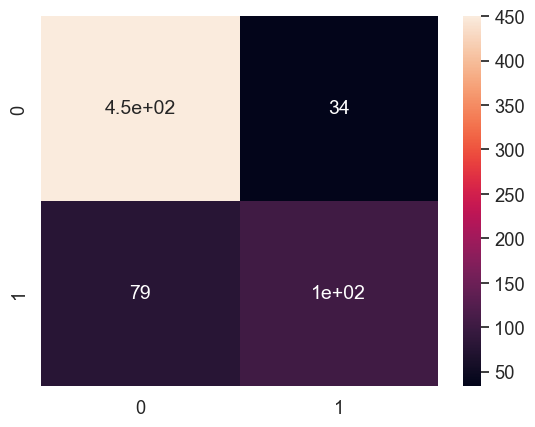

In [ ]:
# Plotting confusion matrix

df_cm_ada2 = pd.DataFrame(confusion_matrix(Y_test, Y_pred_ada2), range(2), range(2))
sns.set(font_scale= 1.2) # for label size
sns.heatmap(df_cm_ada2, annot=True, annot_kws={"size": 14}) # font size

plt.show()

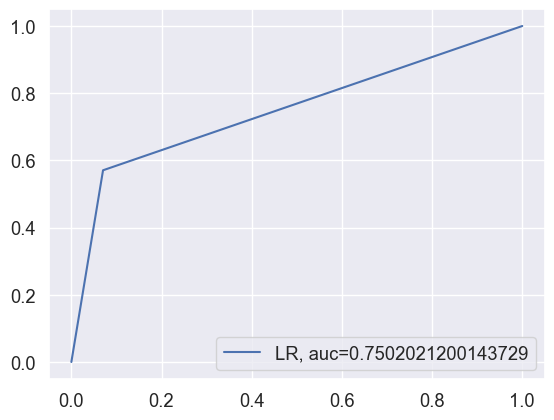

In [ ]:

# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_ada2)
auc = metrics.roc_auc_score(Y_test, Y_pred_ada2) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Model Interpetation:

Using AdaBoost with Random Forest as the "estimator" gives us better results in terms of accuracy, precision, recall, and AUC of ROC compared to the regular AdaBoost. This indicates that AdaBoost with Random Forest is a better choice for our classification task. Still, it's important to pick the best model based on your specific classification goals and needs. Also, take a moment to think about the impact of false positives and false negatives in your application when making the decision.

## XG Boost Classifier

In [ ]:
# Importing XGBoost

import xgboost as xgb

In [ ]:
# Creating model object

clf_xgb = xgb.XGBClassifier(max_depth = 5, n_estimator = 1000, learning_rate = 0.03, n_jobs = -1)

In [ ]:
# Fitting our model over Train data set

clf_xgb.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:56:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=1000, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
# Prediciting value using our model

Y_pred_xgb = clf_xgb.predict(X_test)

In [ ]:
# Calculating Accuracy score, Precision score, Recall score and printing them.

print("Accuracy score for xgb boost:",accuracy_score(Y_test, Y_pred_xgb))
print("Precision score for xgb boost:", precision_score(Y_test, Y_pred_xgb))
print("Recall score for xgb boost:", recall_score(Y_test, Y_pred_xgb))

Accuracy score for xgb boost: 0.8263473053892215
Precision score for xgb boost: 0.765625
Recall score for xgb boost: 0.532608695652174


In [ ]:
# Displaying Confusion matrix

confusion_matrix(Y_test, Y_pred_xgb)

array([[454,  30],
       [ 86,  98]], dtype=int64)

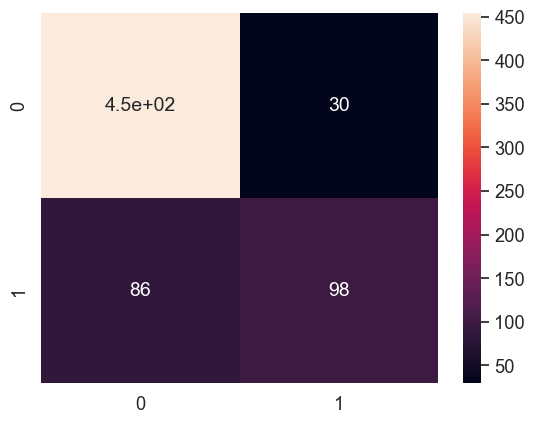

In [ ]:
# Plotting confusion matrix

df_cm_xgb = pd.DataFrame(confusion_matrix(Y_test, Y_pred_xgb), range(2), range(2))
sns.set(font_scale= 1.2) # for label size
sns.heatmap(df_cm_xgb, annot=True, annot_kws={"size": 14}) # font size

plt.show()

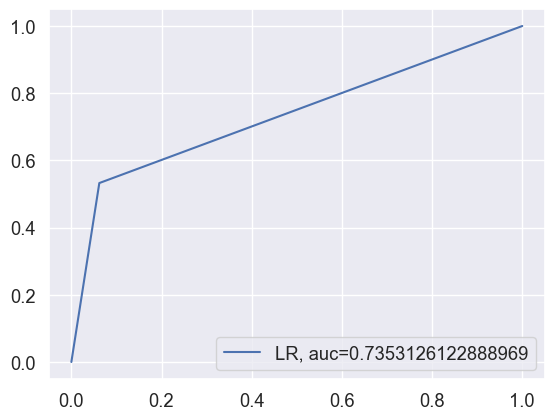

In [ ]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_xgb)
auc = metrics.roc_auc_score(Y_test, Y_pred_xgb) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

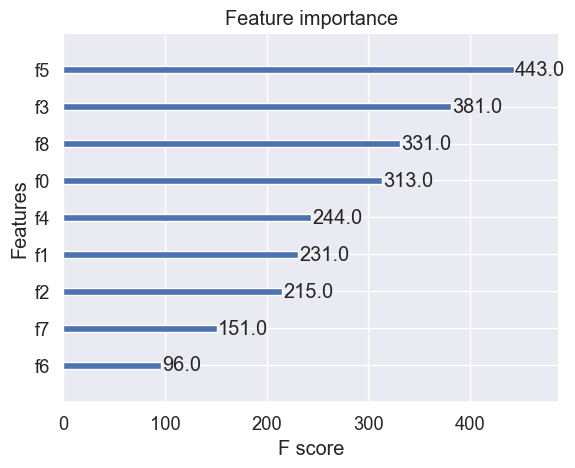

In [ ]:
# Plotting relative important variables

xgb.plot_importance(clf_xgb)

### Using Grid search-XG Boost

In [ ]:
# Creating model object

clf_xgb2 = xgb.XGBClassifier(n_estimators = 5000, learning_rate = 0.01, random_state = 42 )

In [ ]:
# Creating param grid / hyperperameter for grid search

param_test1 = {'max_depth' : range(3,10,2),
                'gamma' : [0.1, 0.2, 0.3],
                'subsample' : [0.8, 0.9],
                'colsample_bytree' : [0.8, 0.9],
                'reg_alpha' : [0.01, 0.1, 1]  }

In [ ]:
# Performing grid search and storing in a model object

grid_search = GridSearchCV(clf_xgb2, param_test1, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [ ]:
# Fitting our model over train data set

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=5000,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [ ]:
# finding best param value using grid search attribute

grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 3,
 'reg_alpha': 0.1,
 'subsample': 0.8}

In [ ]:
# finding best estimator using grid search attribute and storing in object

clf_xgb_best = grid_search.best_estimator_

In [ ]:
# Predicting value using our model

Y_pred_xgb_best = clf_xgb_best.predict(X_test)

In [ ]:
# Calculating Accuracy score, Precision score, Recall score and printing them.

print("Accuracy score for xgb boost:",accuracy_score(Y_test, Y_pred_xgb_best))
print("Precision score for xgb boost:", precision_score(Y_test, Y_pred_xgb_best))
print("Recall score for xgb boost:", recall_score(Y_test, Y_pred_xgb_best))

Accuracy score for xgb boost: 0.8158682634730539
Precision score for xgb boost: 0.6967741935483871
Recall score for xgb boost: 0.5869565217391305


In [ ]:
# Displaying confusion matrix

confusion_matrix(Y_test, Y_pred_xgb_best)

array([[437,  47],
       [ 76, 108]], dtype=int64)

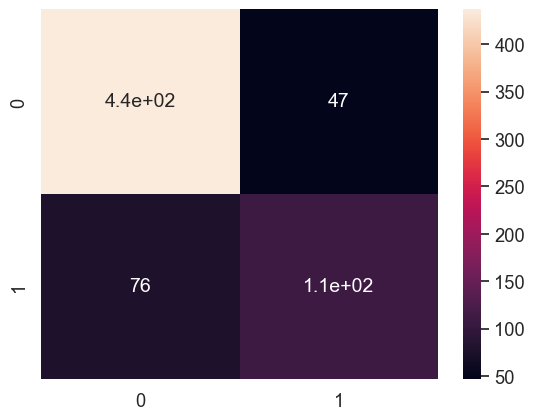

In [ ]:
# Plotting confusion matrix

df_cm_xgb_best = pd.DataFrame(confusion_matrix(Y_test, Y_pred_xgb_best), range(2), range(2))
sns.set(font_scale= 1.2) # for label size
sns.heatmap(df_cm_xgb_best, annot=True, annot_kws={"size": 14}) # font size

plt.show()

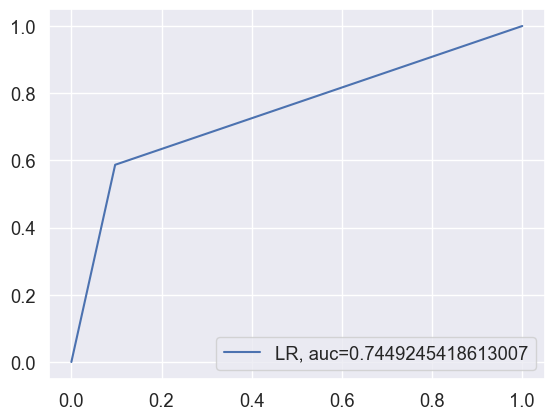

In [ ]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_xgb_best)
auc = metrics.roc_auc_score(Y_test, Y_pred_xgb_best) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Model Interpretation:

Using AdaBoost with Random Forest as the "estimator" gives us better results in terms of accuracy, precision, recall, and AUC of ROC compared to the regular AdaBoost. This indicates that AdaBoost with Random Forest is a better choice for our classification task. Still, it's important to pick the best model based on your specific classification goals and needs. Also, take a moment to think about the impact of false positives and false negatives in your application when making the decision.

### Selection of Perfect Model:

In [ ]:
# Displaying accuracy score of all models

accuracy_scores = {"Logistic Regression": accuracy_score(Y_test, Y_pred_LR),
                 "LDA (Linear discriminant Analysis)": accuracy_score(Y_test, Y_pred_LDA),
                 "KNN": accuracy_score(Y_test, Y_pred_knn),
                 "KNN using Grid Search" : accuracy_score(Y_test, Y_pred_best),
                 "Decision Tree": accuracy_score(Y_test, Y_pred_tree),
                 "Random Forest": accuracy_score(Y_test, y_pred_rf),
                 "Random forest using Grid search" : accuracy_score(Y_test, Y_pred_rf_best),
                 "Gradient Bossting Classifier": accuracy_score(Y_test, Y_pred_gbc),
                 "ADA Boosting Classifier": accuracy_score(Y_test, Y_pred_ada),
                 "ADA Boost using Random forest as estimator": accuracy_score(Y_test, Y_pred_ada2),
                 "XGBoost" : accuracy_score(Y_test, Y_pred_xgb),
                 "XGBoost using Grid search" : accuracy_score(Y_test, Y_pred_xgb_best)}

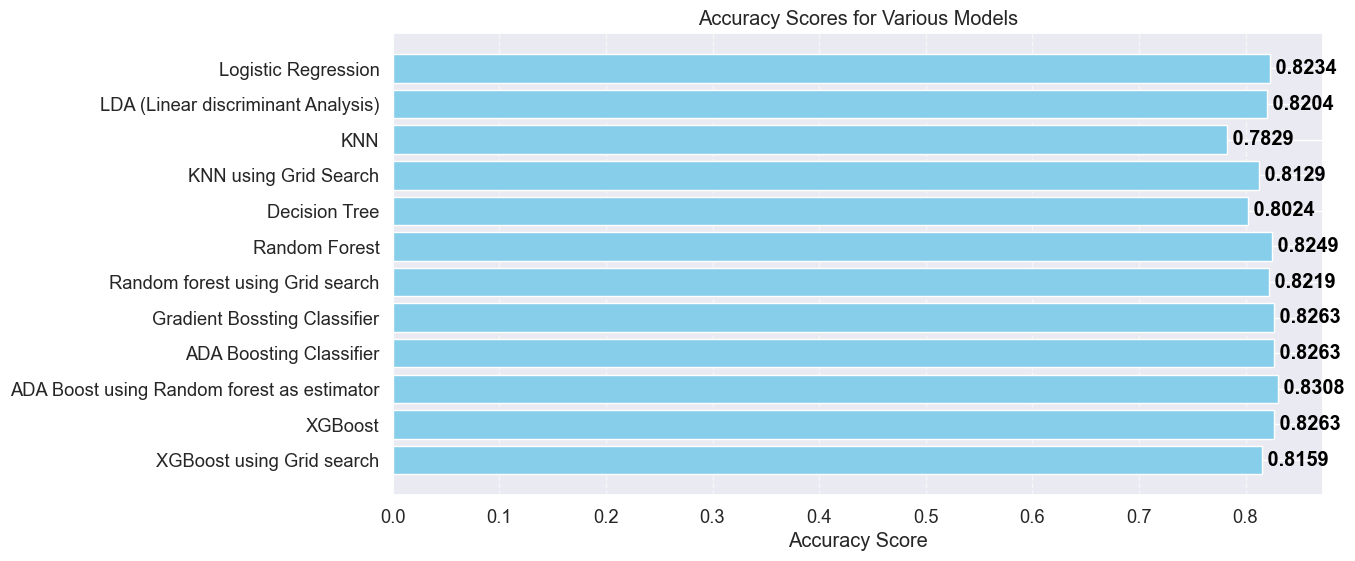

In [ ]:
import matplotlib.pyplot as plt

# Extract model names and accuracy scores
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(models, scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Scores for Various Models')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the accuracy scores on the bars
for i, v in enumerate(scores):
    plt.text(v, i, f' {v:.4f}', color='black', va='center', fontweight='bold')

plt.show()


In [ ]:
# Displaying Precision score of all models

precision_scores = {"Logistic Regression": precision_score(Y_test, Y_pred_LR),
                 "LDA (Linear discriminant Analysis)": precision_score(Y_test, Y_pred_LDA),
                 "KNN": precision_score(Y_test, Y_pred_knn),
                 "KNN using Grid Search" : precision_score(Y_test, Y_pred_best),
                 "Decision Tree": precision_score(Y_test, Y_pred_tree),
                 "Random Forest": precision_score(Y_test, y_pred_rf),
                 "Random forest using Grid search" : precision_score(Y_test, Y_pred_rf_best),
                 "Gradient Bossting Classifier": precision_score(Y_test, Y_pred_gbc),
                 "ADA Boosting Classifier": precision_score(Y_test, Y_pred_ada),
                 "ADA Boost using Random forest as estimator": precision_score(Y_test, Y_pred_ada2),
                 "XGBoost" : precision_score(Y_test, Y_pred_xgb),
                 "XGBoost using Grid search" : precision_score(Y_test, Y_pred_xgb_best)}

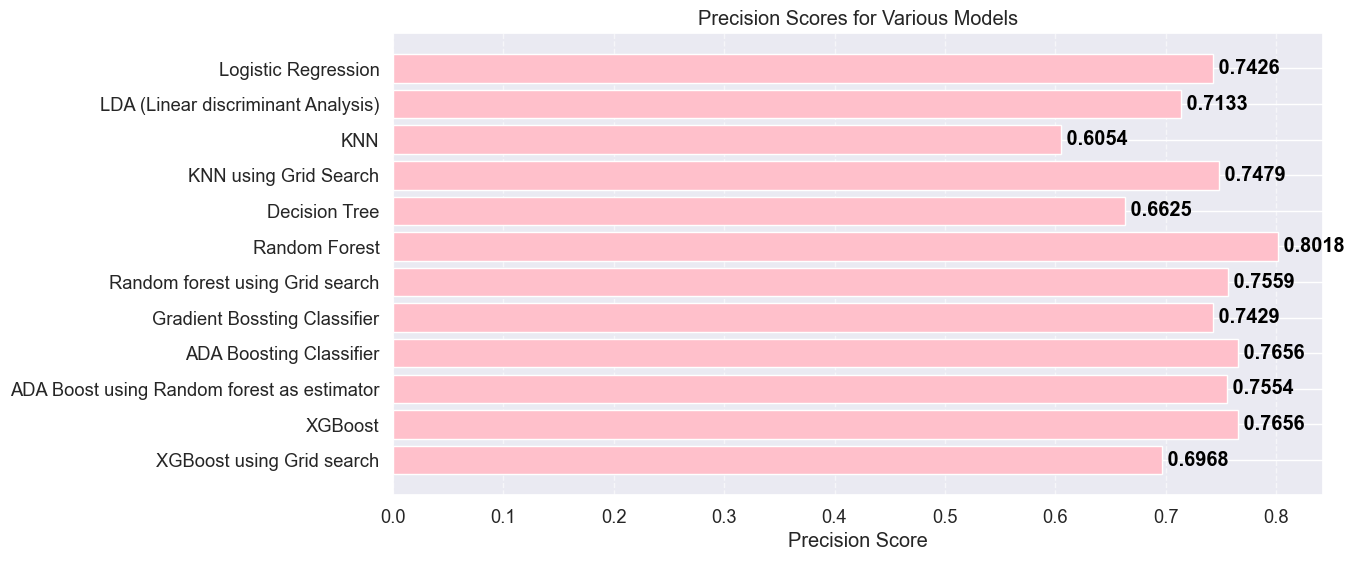

In [ ]:
import matplotlib.pyplot as plt

# Extract model names and Precision scores
models = list(precision_scores.keys())
scores = list(precision_scores.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(models, scores, color='pink')
plt.xlabel('Precision Score')
plt.title('Precision Scores for Various Models')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the Precision scores on the bars
for i, v in enumerate(scores):
    plt.text(v, i, f' {v:.4f}', color='black', va='center', fontweight='bold')

plt.show()


In [ ]:
# Displaying roc_auc score of all models

roc_auc_scores = {"Logistic Regression": roc_auc_score(Y_test, Y_pred_LR),
                 "LDA (Linear discriminant Analysis)": roc_auc_score(Y_test, Y_pred_LDA),
                 "KNN": roc_auc_score(Y_test, Y_pred_knn),
                 "KNN using Grid Search" : roc_auc_score(Y_test, Y_pred_best),
                 "Decision Tree": roc_auc_score(Y_test, Y_pred_tree),
                 "Random Forest": roc_auc_score(Y_test, y_pred_rf),
                 "Random forest using Grid search" : roc_auc_score(Y_test, Y_pred_rf_best),
                 "Gradient Bossting Classifier": roc_auc_score(Y_test, Y_pred_gbc),
                 "ADA Boosting Classifier": roc_auc_score(Y_test, Y_pred_ada),
                 "ADA Boost using Random forest as estimator": roc_auc_score(Y_test, Y_pred_ada2),
                 "XGBoost" : roc_auc_score(Y_test, Y_pred_xgb),
                 "XGBoost using Grid search" : roc_auc_score(Y_test, Y_pred_xgb_best)}

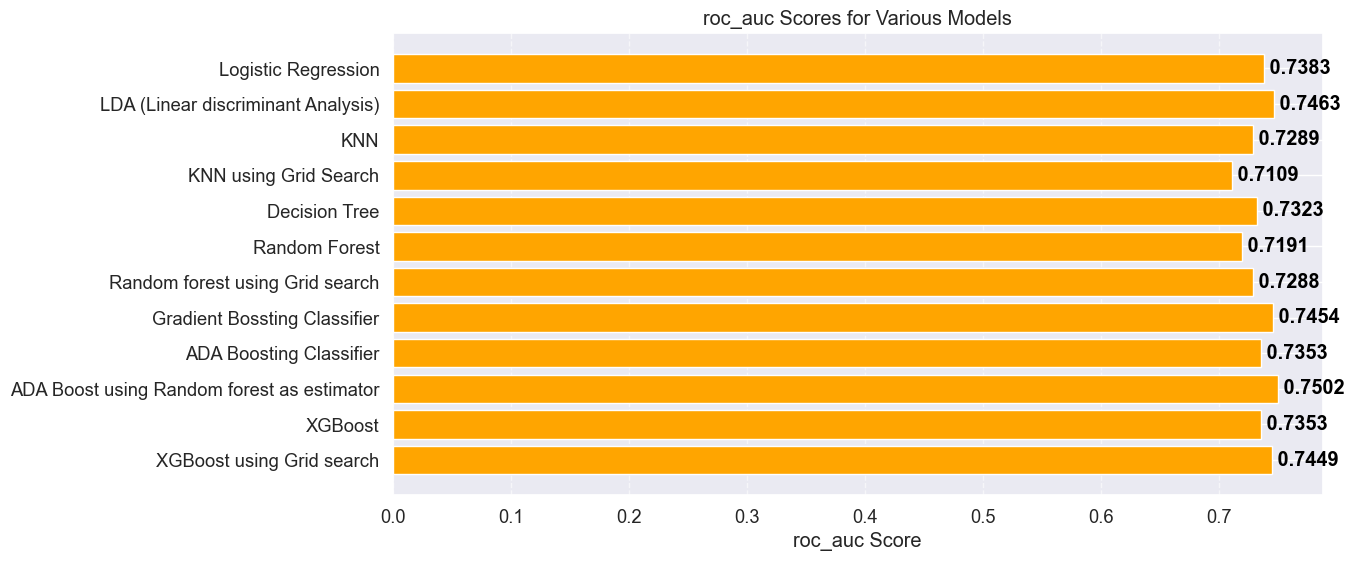

In [ ]:
import matplotlib.pyplot as plt

# Extract model names and roc_auc scores
models = list(roc_auc_scores.keys())
scores = list(roc_auc_scores.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(models, scores, color='orange')
plt.xlabel('roc_auc Score')
plt.title('roc_auc Scores for Various Models')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the roc_auc scores on the bars
for i, v in enumerate(scores):
    plt.text(v, i, f' {v:.4f}', color='black', va='center', fontweight='bold')

plt.show()


### Best Model:

In my analysis, I found that the best model for predicting rainfall in Sydney is the "AdaBoost Classifier with a Random Forest Estimator." This model stands out because it achieved high scores in key metrics. Specifically, it has an accuracy score of 0.8308, a precision score of 0.7554, and a roc_auc score of 0.7502. Based on these scores, the AdaBoost Classifier with a Random Forest Estimator is considered the top-performing model, especially because it excelled in accuracy and roc_auc score.
-


## Prediction on Sample data:

In [ ]:
# Taking some sample scaled values for inputs

input_values_1 = [[0.97451756, -0.35674677, -0.14037714,  0.32111885, -0.21515775,
        0.82174468, -0.87082719,  0.73940006,  0.57625937, -0.59200118]]

input_values_2 =  [[ 7.10834113e-01, -3.56746769e-01,  1.50547058e-01,  2.42195714e-01,
        4.49996679e-01,  2.30389722e+00,  0.00000000e+00,  3.68665813e-16,
        1.63012817e-02, -5.92001181e-01]]

In [ ]:
# Predicting wheather there will be rainfall tomorrow or not using input 1

prediction1 = clf_ada2.predict(input_values_1)

pred = int(prediction1[0])
if pred == 0:
    print("Tomorrow will be no Rain fall")
else:
    print("Tomorrow will be Rain fall")

Tomorrow will be no Rain fall


In [ ]:
# Predicting wheather there will be rainfall tomorrow or not using input 1

prediction2 = clf_ada2.predict(input_values_2)

pred = int(prediction2[0])
if pred == 0:
    print("Tomorrow will be no Rain fall")
else:
    print("Tomorrow will be Rain fall")

Tomorrow will be Rain fall


## 1. MY views on the problem statement?
This valuable problem statement addressses the practical need for accurate rainfall prediction important because it speaks to the real-life need for accurate rainfall prediction. It offers applying classification models to a real-world case. Problem Statement is to create a Machine Learning model that can predict the Rainfall occurrence at Sydney, Australia based on various classification models such as Decision Tree and Ensemble methods. This is an interesting research challenge and it has a real-world significance since everyone depends on accurate weather forecasts to live their day-to-day lives.


##  2.What will be your approach to solving the task?



** As per opinion and the basis of knowledge that what I gain from this course,I would like to follw the process such data importing,data preprocessing,model selection,model evaluation,model finalization and any suggestion from which the model can be improved.


#### Data Loading and Exploration:
* We have to load the Sydney rainfall data file into a pandas dataframe.
* Explore the dataset to understand its structure,features and the datatypes.
* Perform descriptive statistics to gain insights into data.

#### Data Preprocessing:
* WE have to create dummy variable for the "RainToday & RainTomorrow" field using the one-hot encoding.
* Checking for the missing values and outliers.
* Executing correleation,to analyze significant correleation with dependent variable and "Multi Collinearity" between to independent variable and by deleting the unnecessary data.

#### Model Selection:
* Choose and implement multiple classification & ensemble models,such as logistics Regression,LDA,KNN,RandomBoostClassifier,GradientBoosting,ADA Bosst cLassifier &XG Boost Classifier.
* Evaluate the each model's performance using appropriate metrics.

#### Model Evaluation:
* Compare the metrics of each model to evaluate its performance.
* Based on the problem unique needs and criteria,choose the model that gives the greatest performance.

#### Model Finalization
* Choose the model with high performance on the assesment measures,taking into such as accuracy,interpretability and computational complexity.

## What were the available ML model options you had to perform this task?

**For the task of predicting rainfall in Sydney, there are several machine learning model options available. Here are some of the key model options that can be considered:**

**Decision Trees:** Decision tree classifiers are a fundamental classification model. They work by recursively splitting the data into subsets based on the most significant input features, creating a tree-like structure.

**Random Forest:** Random Forest is an ensemble method that combines multiple decision trees to improve prediction accuracy. It uses bagging (bootstrap aggregating) to create multiple decision trees and averages their predictions.

**Gradient Boosting:** Gradient Boosting is another ensemble method that combines multiple weak learners (typically decision trees) to create a strong learner.

**AdaBoost:** AdaBoost is an ensemble method that combines multiple weak classifiers to create a strong classifier. It adjusts the weights of data points to focus on examples that are difficult to classify.

**XGBoost:** XGBoost is a popular gradient boosting algorithm known for its high performance. It is suitable for classification tasks and can provide accurate predictions.

**Logistic Regression:** While logistic regression is primarily used for binary classification, it can also be applied to multi-class classification tasks. It's a simple and interpretable model.

**K-Nearest Neighbors (KNN):** KNN is a non-parametric model that classifies data points based on the majority class of their nearest neighbors.

## 4. Which model’s performance is best and what could be the possible reason for that?


For this task according to my analysis i will consider the model with the best performance for predicting rainfall in Sydney is the **"AdaBoost Classifier with a Random Forest Estimator"**.

This model performance is more better than the other models according to metrices. Like AdaBoost Classifier with a Random Forest Estimator scored metrices (Accuracy Score (0.8308), Precision Score (0.7554), Recall Score (0.5707), ROC of AUC Score (0.7502)).

Also, AdaBoost is an ensemble method that combines multiple classifiers to create a strong classifier. It adjusts the weights of data points to focus on examples that are difficult to classify.

**The possible reasons for the superior performance of the AdaBoost Classifier with a Random Forest Estimator is:**

* **Combining Strengths:** AdaBoost combines multiple weak learners, in this case, Random Forest, to create a strong ensemble model. This helps capture complex patterns and relationships in the data that individual models might miss.

* **Error Correction:** AdaBoost focuses on correcting the errors made by the previous models. This iterative approach improves the model's accuracy with each iteration.

* **Balanced Precision and Recall:** The model achieves a good balance between precision and recall, which is crucial for weather prediction. It accurately identifies rainy days (precision) while not missing too many of them (recall).

* **AUC of ROC Score:** The AUC of ROC score is relatively high, indicating that the model has a strong ability to discriminate between days with and without rainfall.

## 5. What steps can you take to improve this selected model’s performance even further?


* **Hyperparameter Tuning:**

Experiment with different hyperparameters for both the AdaBoost and Random Forest components of the model. This includes the number of estimators, learning rate, maximum depth, and minimum samples per leaf in the Random Forest.

* **Feature Engineering:**

Carefully analyze the available features and consider creating new features that might capture more relevant information for rainfall prediction.

* **Data Augmentation:**

If possible, gather additional data or historical weather information to increase the size and diversity of the dataset. More data can lead to a more robust and accurate model.

* **Cross-Validation:**

Implement cross-validation techniques to ensure that the model's performance is consistent across different subsets of the data. This helps in detecting overfitting and generalizing better.

* **Ensemble Variations:**

Explore variations of ensemble techniques. You can try other boosting algorithms like Gradient Boosting or XGBoost to see if they provide better results when combined with the Random Forest base estimator.

* **Optimize Data Preprocessing:**

Ensure that data preprocessing steps, such as handling missing values and encoding categorical variables, are optimized for the specific characteristics of the dataset.

* **Regularization:**

Consider adding regularization techniques to the Random Forest component to control model complexity and prevent overfitting.